In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, fcluster

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set the style for seaborn
sns.set(style="whitegrid")

import xgboost as xgb
xgb_params = {"random_state": 42}
model = xgb.XGBRegressor(**xgb_params)

In [2]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

df.head()

ID  Year  Month  Day   kingdom   latitude  longitude  Avg_Temperature  \
0   1     1      4    1   Arcadia  24.280002 -37.229980            25.50   
1   2     1      4    1  Atlantis  22.979999 -37.329990           299.65   
2   3     1      4    1    Avalon  22.880000 -37.130006            26.30   
3   4     1      4    1   Camelot  24.180003 -36.929994            24.00   
4   5     1      4    1     Dorne  25.780002 -37.530000            28.00   

   Avg_Feels_Like_Temperature  Temperature_Range  \
0                       30.50                8.5   
1                      305.15                5.9   
2                       31.50                5.2   
3                       28.40                8.2   
4                       32.80                5.7   

   Feels_Like_Temperature_Range  Radiation  Rain_Amount  Rain_Duration  \
0                          10.3      22.52        58.89             16   
1                           8.2      22.73        11.83             12   
2                           6.4      22.73        11.83             12   
3                          10.7      22.67        75.27             16   
4                          10.2      22.35         4.81              8   

   Wind_Speed  Wind_Direction  Evapotranspiration  
0         8.6             283            1.648659  
1        15.8             161            1.583094  
2        15.8             161            1.593309  
3         6.4             346            1.638997  
4        16.7             185            1.719189

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84960 entries, 0 to 84959
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            84960 non-null  int64  
 1   Year                          84960 non-null  int64  
 2   Month                         84960 non-null  int64  
 3   Day                           84960 non-null  int64  
 4   kingdom                       84960 non-null  object 
 5   latitude                      84960 non-null  float64
 6   longitude                     84960 non-null  float64
 7   Avg_Temperature               84960 non-null  float64
 8   Avg_Feels_Like_Temperature    84960 non-null  float64
 9   Temperature_Range             84960 non-null  float64
 10  Feels_Like_Temperature_Range  84960 non-null  float64
 11  Radiation                     84960 non-null  float64
 12  Rain_Amount                   84960 non-null  float64
 13  R

In [4]:
# Check for missing values
print(df.isnull().sum())

ID                              0
Year                            0
Month                           0
Day                             0
kingdom                         0
latitude                        0
longitude                       0
Avg_Temperature                 0
Avg_Feels_Like_Temperature      0
Temperature_Range               0
Feels_Like_Temperature_Range    0
Radiation                       0
Rain_Amount                     0
Rain_Duration                   0
Wind_Speed                      0
Wind_Direction                  0
Evapotranspiration              0
dtype: int64


In [5]:
df.describe()

ID          Year         Month           Day      latitude  \
count  84960.000000  84960.000000  84960.000000  84960.000000  84960.000000   
mean   42480.500000      4.610876      6.666667     15.735876     24.003334   
std    24525.983772      2.239331      3.402793      8.802867      0.798622   
min        1.000000      1.000000      1.000000      1.000000     22.880000   
25%    21240.750000      3.000000      4.000000      8.000000     23.680003   
50%    42480.500000      5.000000      7.000000     16.000000     23.780002   
75%    63720.250000      7.000000     10.000000     23.000000     24.280002   
max    84960.000000      8.000000     12.000000     31.000000     26.580005   

          longitude  Avg_Temperature  Avg_Feels_Like_Temperature  \
count  84960.000000     84960.000000                84960.000000   
mean     -37.266665       135.600751                  139.735375   
std        0.488873       133.650417                  133.937168   
min      -37.729980        18.600000                   18.700000   
25%      -37.630006        26.300000                   30.300000   
50%      -37.530000        28.100000                   32.500000   
75%      -37.130006       299.350000                  303.850000   
max      -35.729980       303.650000                  309.650000   

       Temperature_Range  Feels_Like_Temperature_Range     Radiation  \
count       84960.000000                  84960.000000  84960.000000   
mean            5.345287                      6.361224     20.338598   
std             1.977739                      2.371880      4.118938   
min             0.500000                      0.800000      3.190000   
25%             3.800000                      4.500000     18.070000   
50%             5.100000                      6.200000     20.960000   
75%             6.500000                      8.000000     23.300000   
max            15.400000                     17.300000     30.100000   

        Rain_Amount  Rain_Duration    Wind_Speed  Wind_Direction  \
count  84960.000000   84960.000000  84960.000000    84960.000000   
mean       7.723850       8.895680     15.629291      215.831297   
std       13.477186       7.231531      6.198760       93.917858   
min        0.000000       0.000000      2.300000        0.000000   
25%        0.520000       2.000000     11.100000      119.000000   
50%        3.380000       8.000000     15.100000      255.000000   
75%        9.490000      15.000000     19.000000      286.000000   
max      440.440000      24.000000     50.200000      359.000000   

       Evapotranspiration  
count        84960.000000  
mean             1.568724  
std              0.219856  
min              0.425268  
25%              1.451614  
50%              1.589235  
75%              1.715598  
max              2.212660

### Some Validations to check if data is accurate

In [6]:
# Do Validations to check if the data is accurate

print(df.kingdom.unique())

['Arcadia' 'Atlantis' 'Avalon' 'Camelot' 'Dorne' 'Eden' 'El Dorado'
 'Elysium' 'Emerald City' 'Helios' 'Krypton' 'Metropolis' 'Midgar'
 'Midgard' 'Mordor' 'Neo-City' 'Neo-Tokyo' 'Nirvana' 'Olympus' 'Pandora'
 'Rapture' 'Rivendell' 'Serenity' 'Shangri-La' 'Solara' 'Solstice'
 'Sunspear' 'Utopia' 'Valyria' 'Winterfell']


In [7]:
# Ensure all kingdoms have equal record counts
kingdom_counts = df["kingdom"].value_counts()
kingdom_counts.nunique() > 1  # True if counts vary

False

In [8]:
# Check if Dates are correct, and if there are missing dates

# Ensure Year, Month, Day are acceptable integers to convert to datetime data type
df["Month"] = df["Month"].astype(str).str.zfill(2)
df["Day"] = df["Day"].astype(str).str.zfill(2)

In [9]:
df["Year"] = df['Year'] + 1998
df["Year"].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006])

In [10]:
# Convert Year, Month, and Day to strings and concatenate them
df['date_string'] = df['Year'].astype(str).str.zfill(4) + '-' + \
                    df['Month'].astype(str).str.zfill(2) + '-' + \
                    df['Day'].astype(str).str.zfill(2)

# Check the new date_string column
print(df['date_string'].head())

0    1999-04-01
1    1999-04-01
2    1999-04-01
3    1999-04-01
4    1999-04-01
Name: date_string, dtype: object


In [11]:
# Convert date_string to datetime, coercing errors to NaT
df['date'] = pd.to_datetime(df['date_string'], errors='coerce')

# Identify and print any invalid dates
invalid_dates = df[df['date'].isna() & df['date_string'].notna()]

if not invalid_dates.empty:
    print("Invalid Dates Found:")
    print(invalid_dates[['date_string']])
else:
    print("All dates converted successfully.")

All dates converted successfully.


In [12]:
df['date'].tail()

84955   2006-12-31
84956   2006-12-31
84957   2006-12-31
84958   2006-12-31
84959   2006-12-31
Name: date, dtype: datetime64[ns]

In [13]:
# Create a complete date range from the minimum to the maximum date
complete_date_range = pd.date_range(start=df['date'].min(), end=df['date'].max())

# Identify missing dates by checking which dates in the complete range are not in the DataFrame
missing_dates = complete_date_range[~complete_date_range.isin(df['date'])]

# Print the results
if len(missing_dates) > 0:
    print("Missing Dates Found:")
    print(missing_dates)
else:
    print("No missing dates. All dates are present.")

No missing dates. All dates are present.


In [14]:
# Group by kingdom and check unique combinations of longitude and latitude
unique_coords_per_kingdom = df.groupby('kingdom')[['longitude', 'latitude']].nunique()

# Check if any kingdom has more than one unique combination of longitude and latitude
non_unique_kingdoms = unique_coords_per_kingdom[unique_coords_per_kingdom['longitude'] > 1]

if not non_unique_kingdoms.empty:
    print("The following kingdoms have non-unique longitude and latitude combinations:")
    print(non_unique_kingdoms)
else:
    print("All kingdoms have unique longitude and latitude combinations.")

All kingdoms have unique longitude and latitude combinations.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84960 entries, 0 to 84959
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            84960 non-null  int64         
 1   Year                          84960 non-null  int64         
 2   Month                         84960 non-null  object        
 3   Day                           84960 non-null  object        
 4   kingdom                       84960 non-null  object        
 5   latitude                      84960 non-null  float64       
 6   longitude                     84960 non-null  float64       
 7   Avg_Temperature               84960 non-null  float64       
 8   Avg_Feels_Like_Temperature    84960 non-null  float64       
 9   Temperature_Range             84960 non-null  float64       
 10  Feels_Like_Temperature_Range  84960 non-null  float64       
 11  Radiation                   

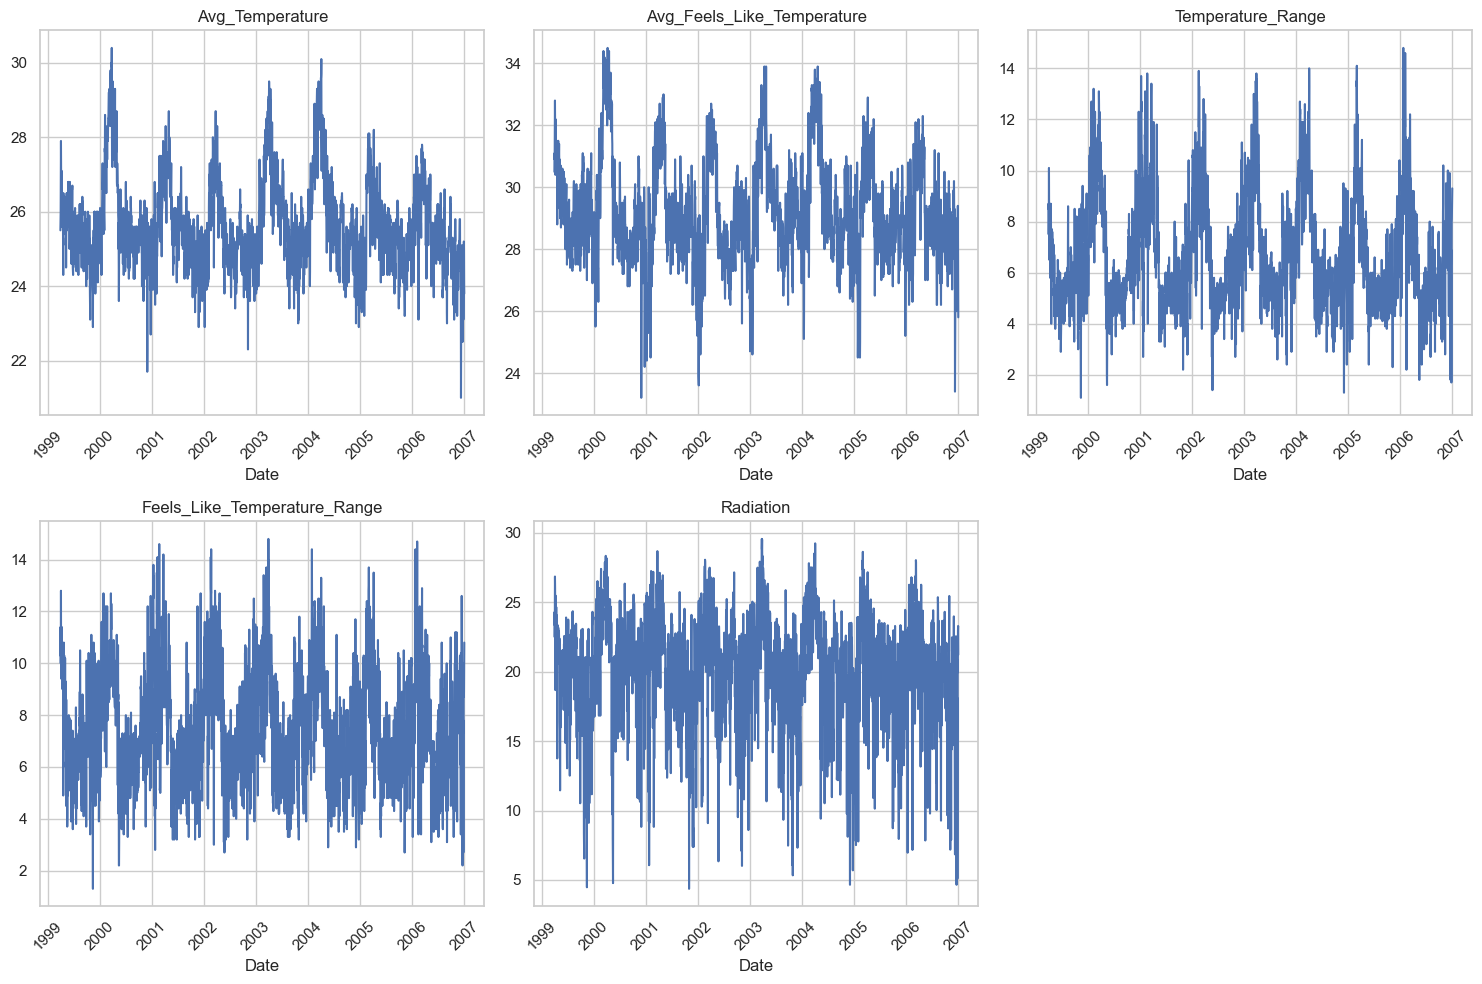

In [16]:
# Choose a specific kingdom to plot
kingdom_name = "Arcadia"  # Replace with the actual kingdom name

# Filter the DataFrame for the chosen kingdom
kingdom_data = df[df['kingdom'] == kingdom_name]

# Create a figure and axes for 5 subplots arranged in 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

# Define the features to plot
features = [
    'Avg_Temperature',
    'Avg_Feels_Like_Temperature',
    'Temperature_Range',
    'Feels_Like_Temperature_Range',
    'Radiation'
]

# Loop through the features and create a subplot for each
for i, feature in enumerate(features):
    sns.lineplot(data=kingdom_data, x='date', y=feature, ax=axs[i])
    axs[i].set_title(feature)  # Use the feature name as the title
    axs[i].set_ylabel('')  # Leave y-axis label empty
    axs[i].set_xlabel('Date')
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45)

# Hide any unused subplots
for j in range(len(features), len(axs)):
    axs[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

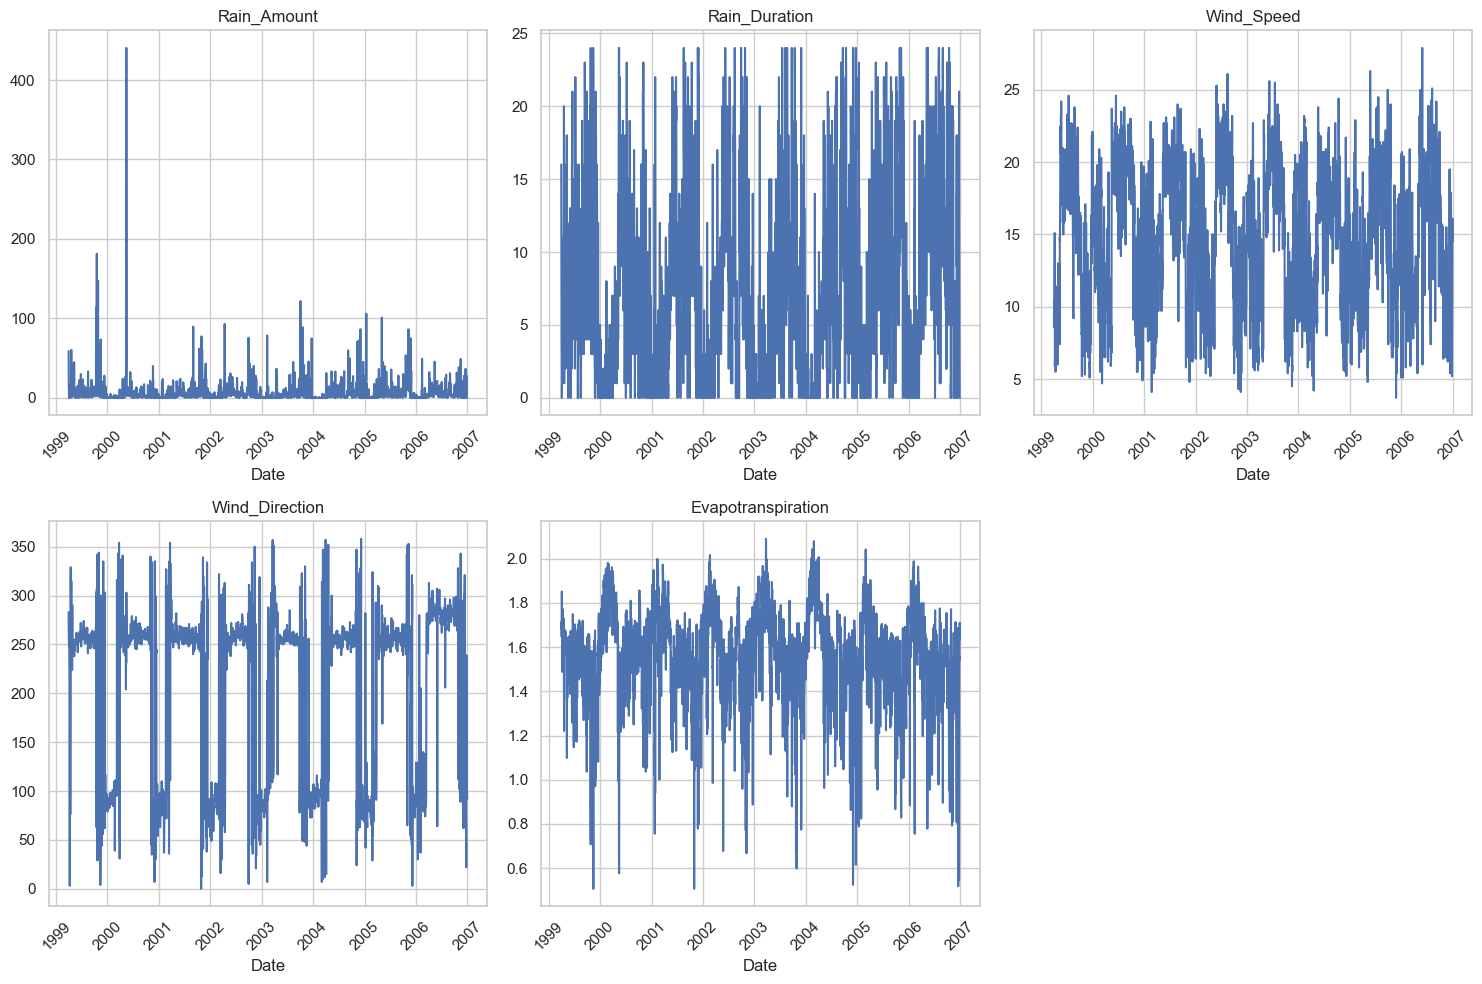

In [17]:
# Create a figure and axes for 5 subplots arranged in 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

# Define the new features to plot
new_features = [
    'Rain_Amount',
    'Rain_Duration',
    'Wind_Speed',
    'Wind_Direction',
    'Evapotranspiration'
]

# Loop through the new features and create a subplot for each
for i, feature in enumerate(new_features):
    sns.lineplot(data=kingdom_data, x='date', y=feature, ax=axs[i])
    axs[i].set_title(feature)  # Use the feature name as the title
    axs[i].set_ylabel('')  # Leave y-axis label empty
    axs[i].set_xlabel('Date')
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45)

# Hide any unused subplots
for j in range(len(new_features), len(axs)):
    axs[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

> The above time series plot represents data from a selected kingdom over an 8-year period. Across all features, a clear seasonal trend is observed—indicating patterns that consistently repeat each year. Notably, there is a significant outlier in the 'rain amount' feature. While this could reflect a real event, such as a cyclone. To confirm if this is a real event, we should compare it with data from other kingdoms. To clearly see the repeating yearly patterns and decide how to break the data into sliding windows, it's helpful to zoom in and plot just one year's data.

![description](Map2.png)


### Plotting All Features to understand data more


In [18]:
def plot_all_kingdoms(feature):
    # Create a figure and axes for 30 subplots arranged in 3 columns and 10 rows
    fig, axs = plt.subplots(10, 3, figsize=(15, 30))
    axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

    # Get the unique kingdoms
    kingdoms = df['kingdom'].unique()

    # Loop through each kingdom and plot Avg_Temperature
    for i, kingdom in enumerate(kingdoms):
        kingdom_data = df[df['kingdom'] == kingdom]
        sns.lineplot(data=kingdom_data, x='date', y=feature, ax=axs[i])
        axs[i].set_title(kingdom)  # Set the title to the kingdom name
        axs[i].set_ylabel('')  # Set y-axis label
        axs[i].set_xlabel('Date')  # Set x-axis label
        plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45)  # Rotate x-axis labels

    # Hide any unused subplots (if there are fewer than 30 kingdoms)
    for j in range(len(kingdoms), len(axs)):
        axs[j].set_visible(False)

    # Adjust layout
    plt.tight_layout()
    plt.show()

#### 1. Avg_Temperature

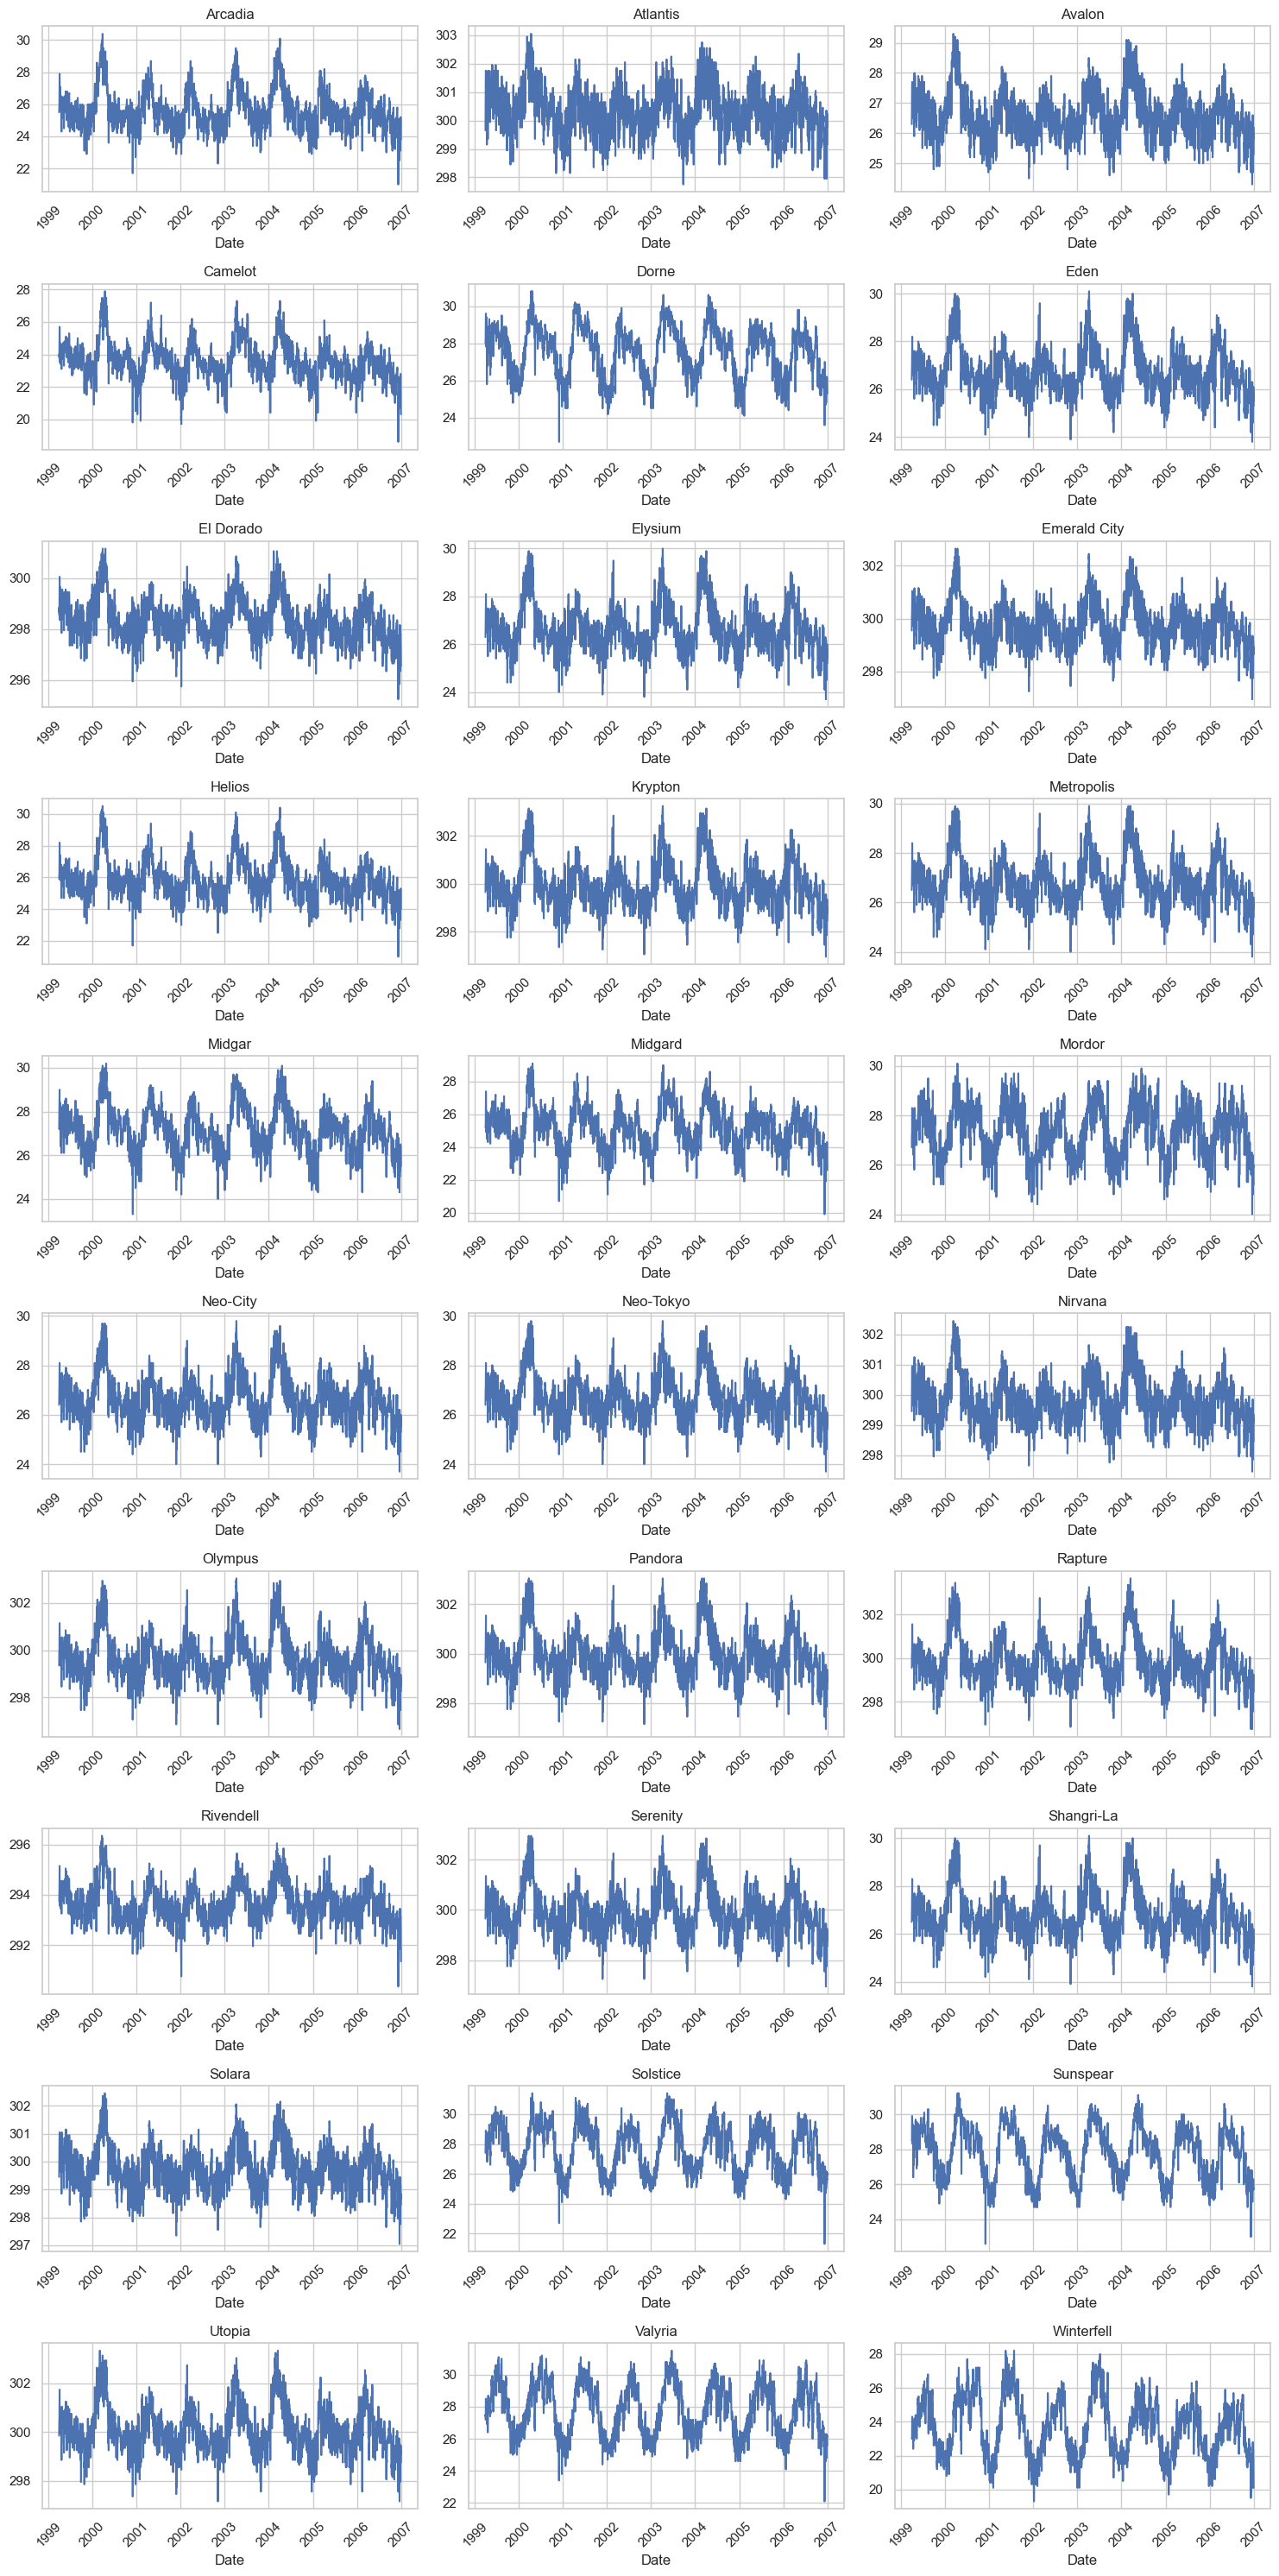

In [19]:
plot_all_kingdoms('Avg_Temperature')

#### 2. Avg_Feels_Like_Temperature

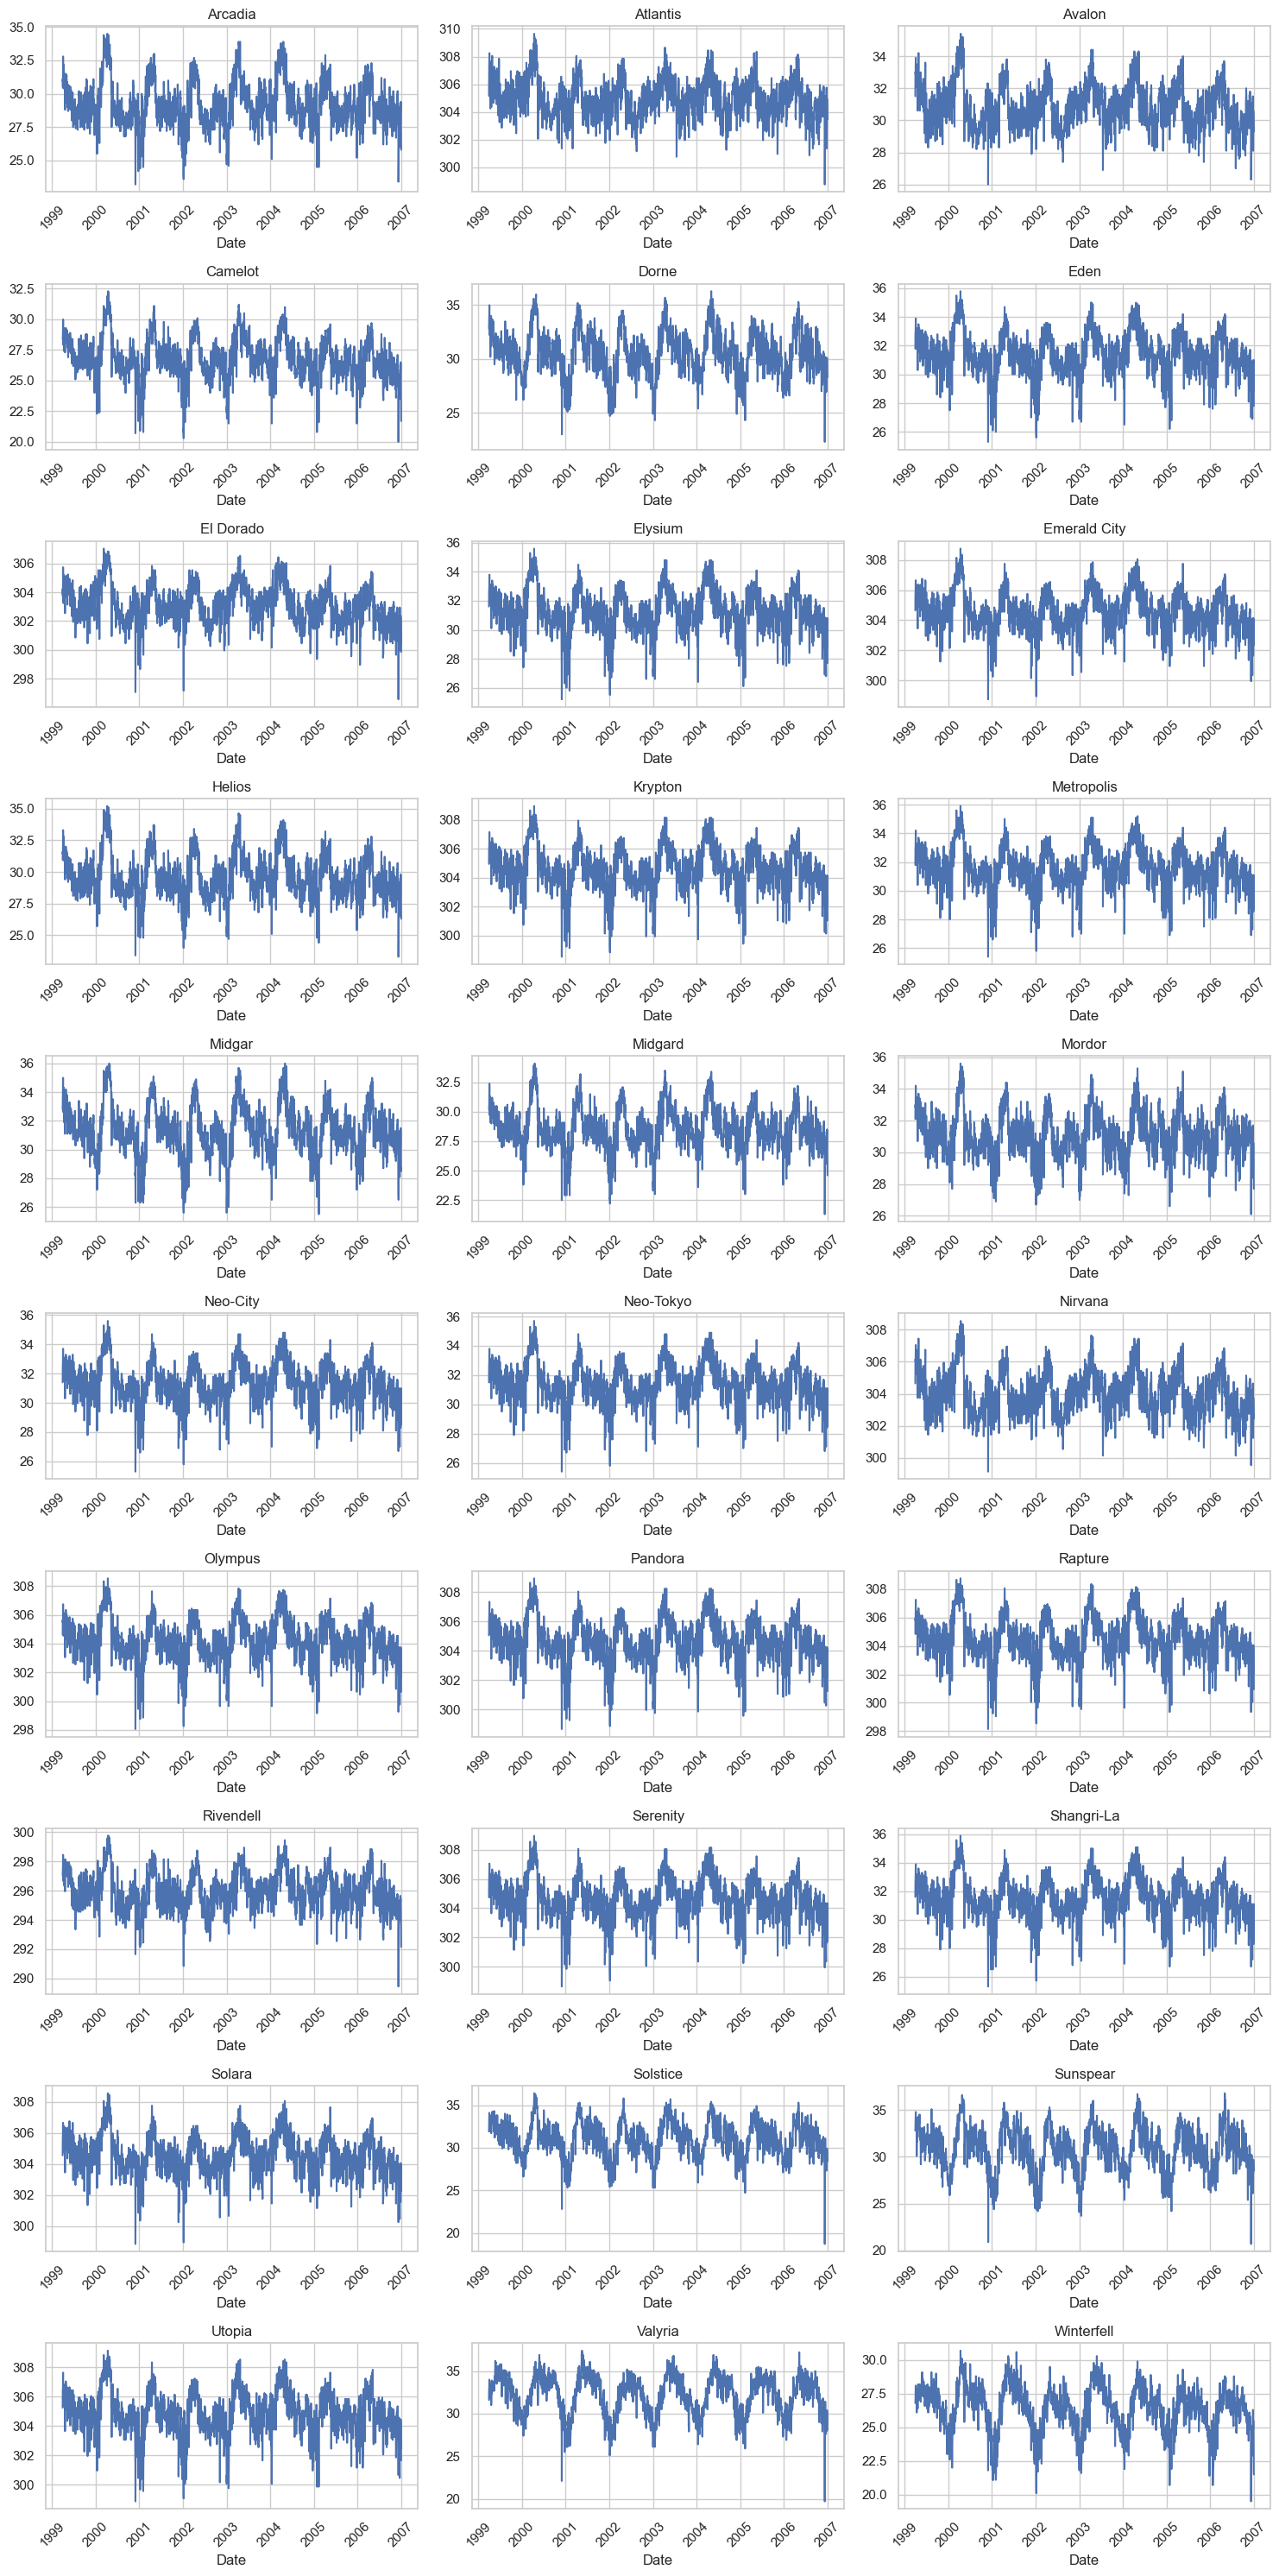

In [20]:
plot_all_kingdoms('Avg_Feels_Like_Temperature')

> Some kingdoms show very high temperature values around 300, while others have values closer to 30. This difference is likely due to varying measurement units. Values around 30 are most likely in degrees Celsius, while values around 300 suggest temperatures recorded in Kelvin. To convert from Kelvin to Celsius, the formula is:

$$ Celsius = Kelvin - 273.15 $$

#### 3. Temperature_Range

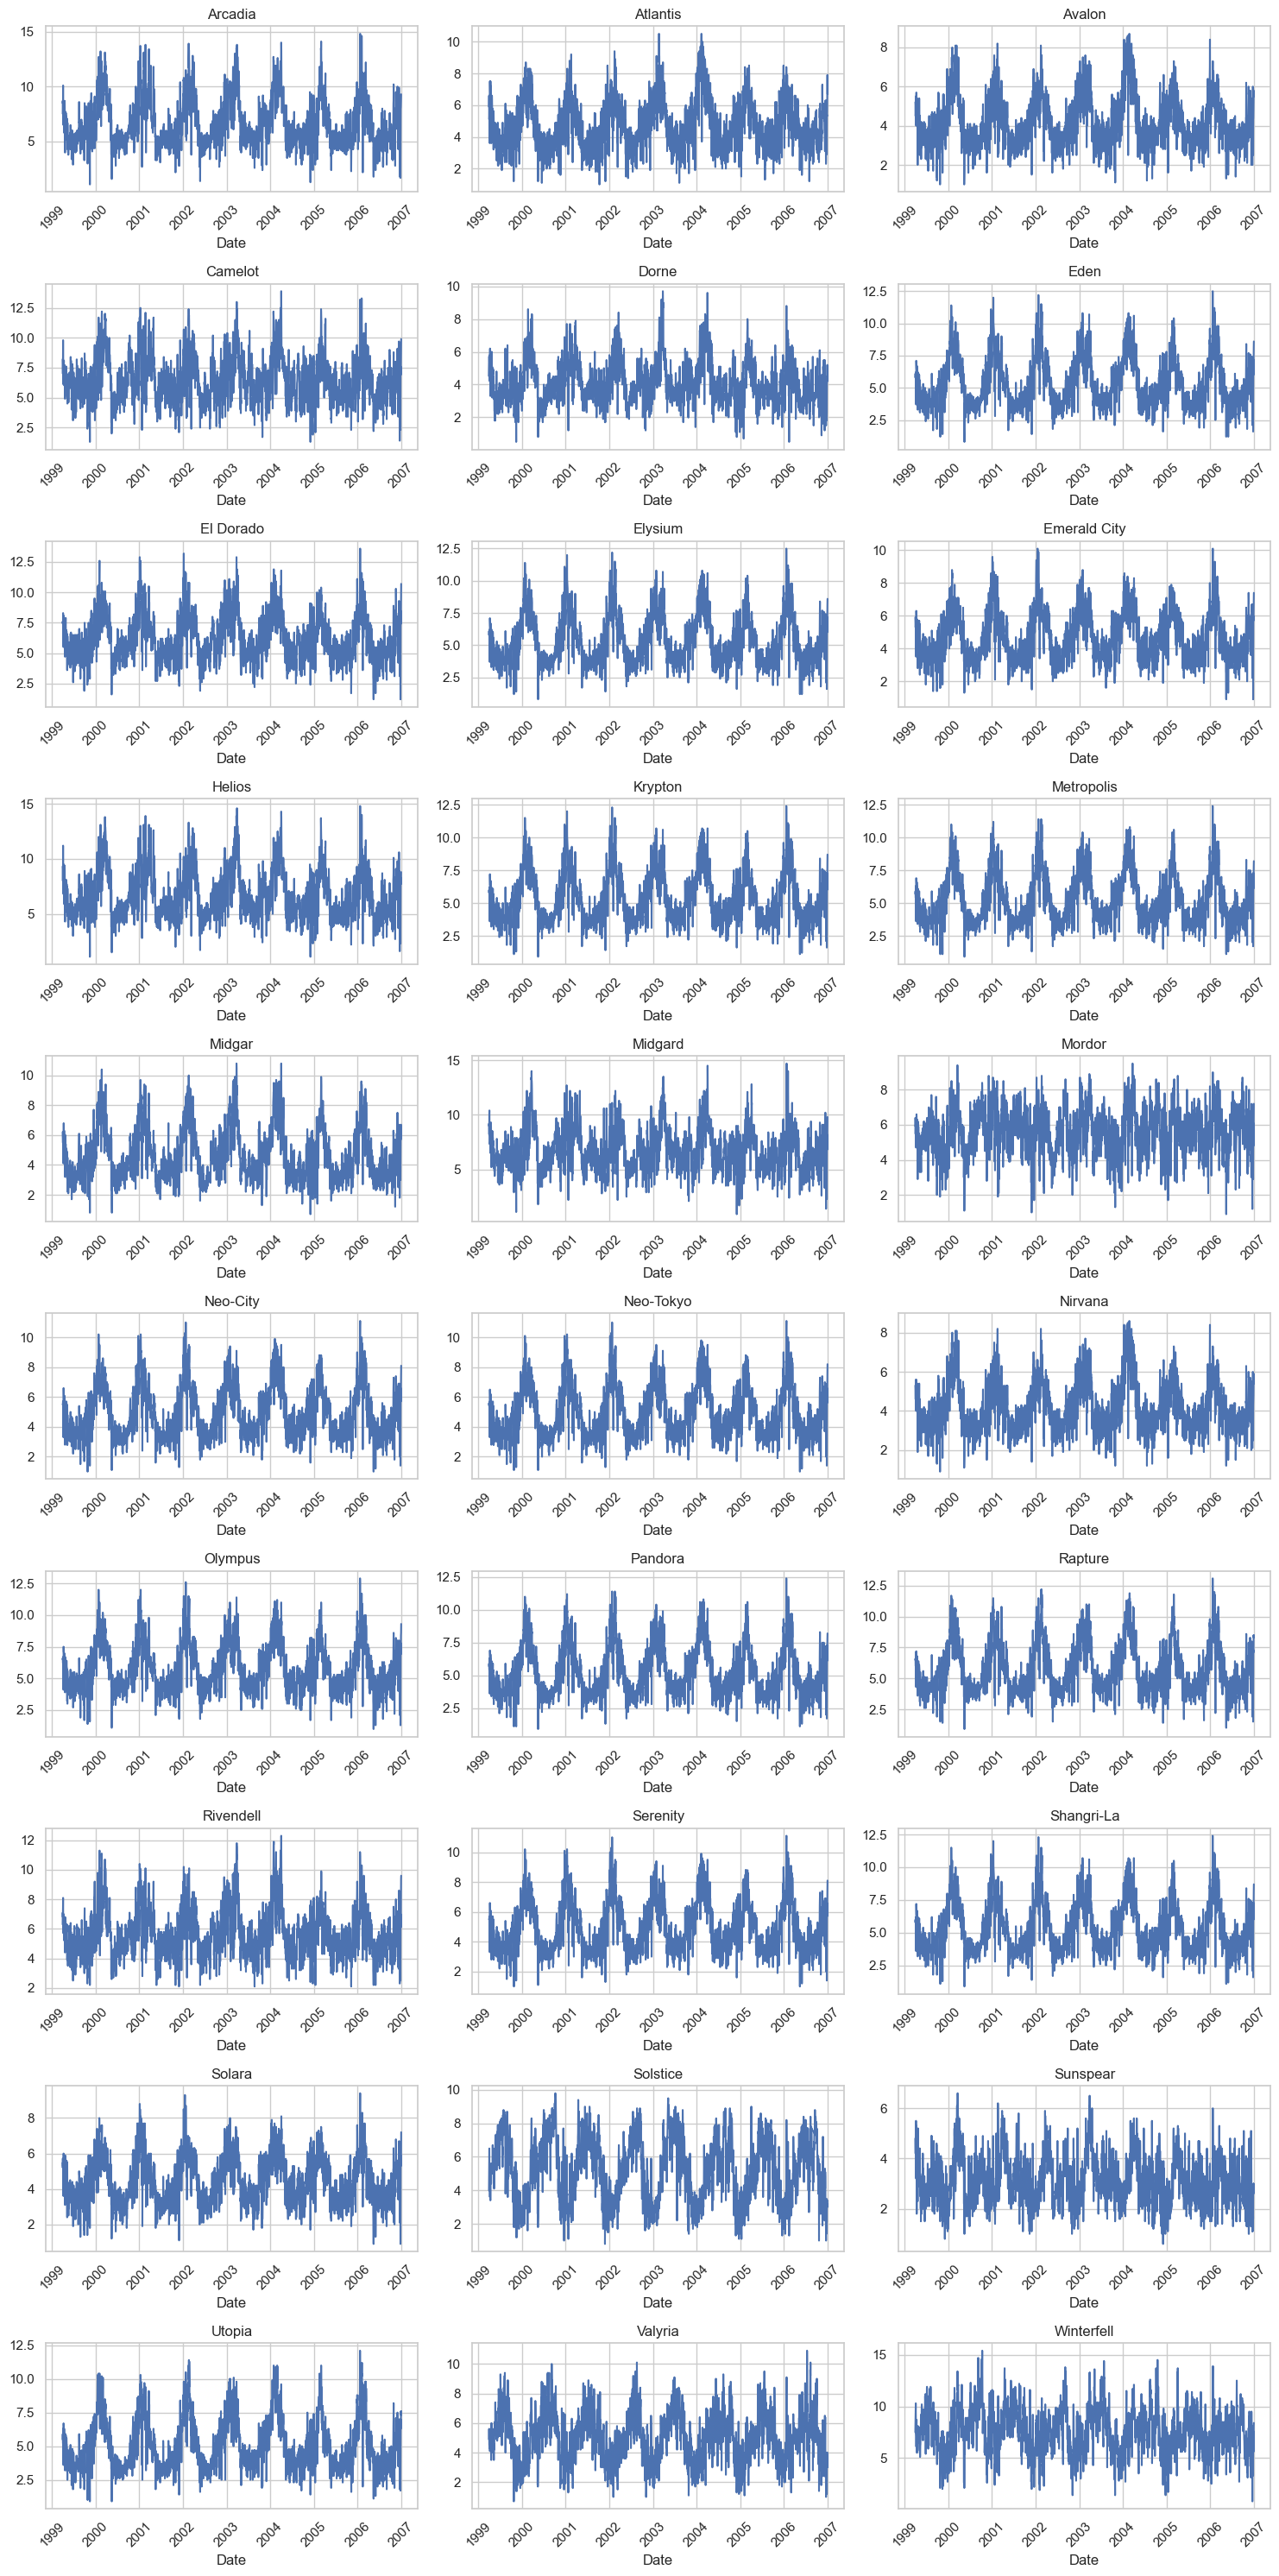

In [21]:
plot_all_kingdoms('Temperature_Range')

#### 4. Feels_Like_Temperature_Range

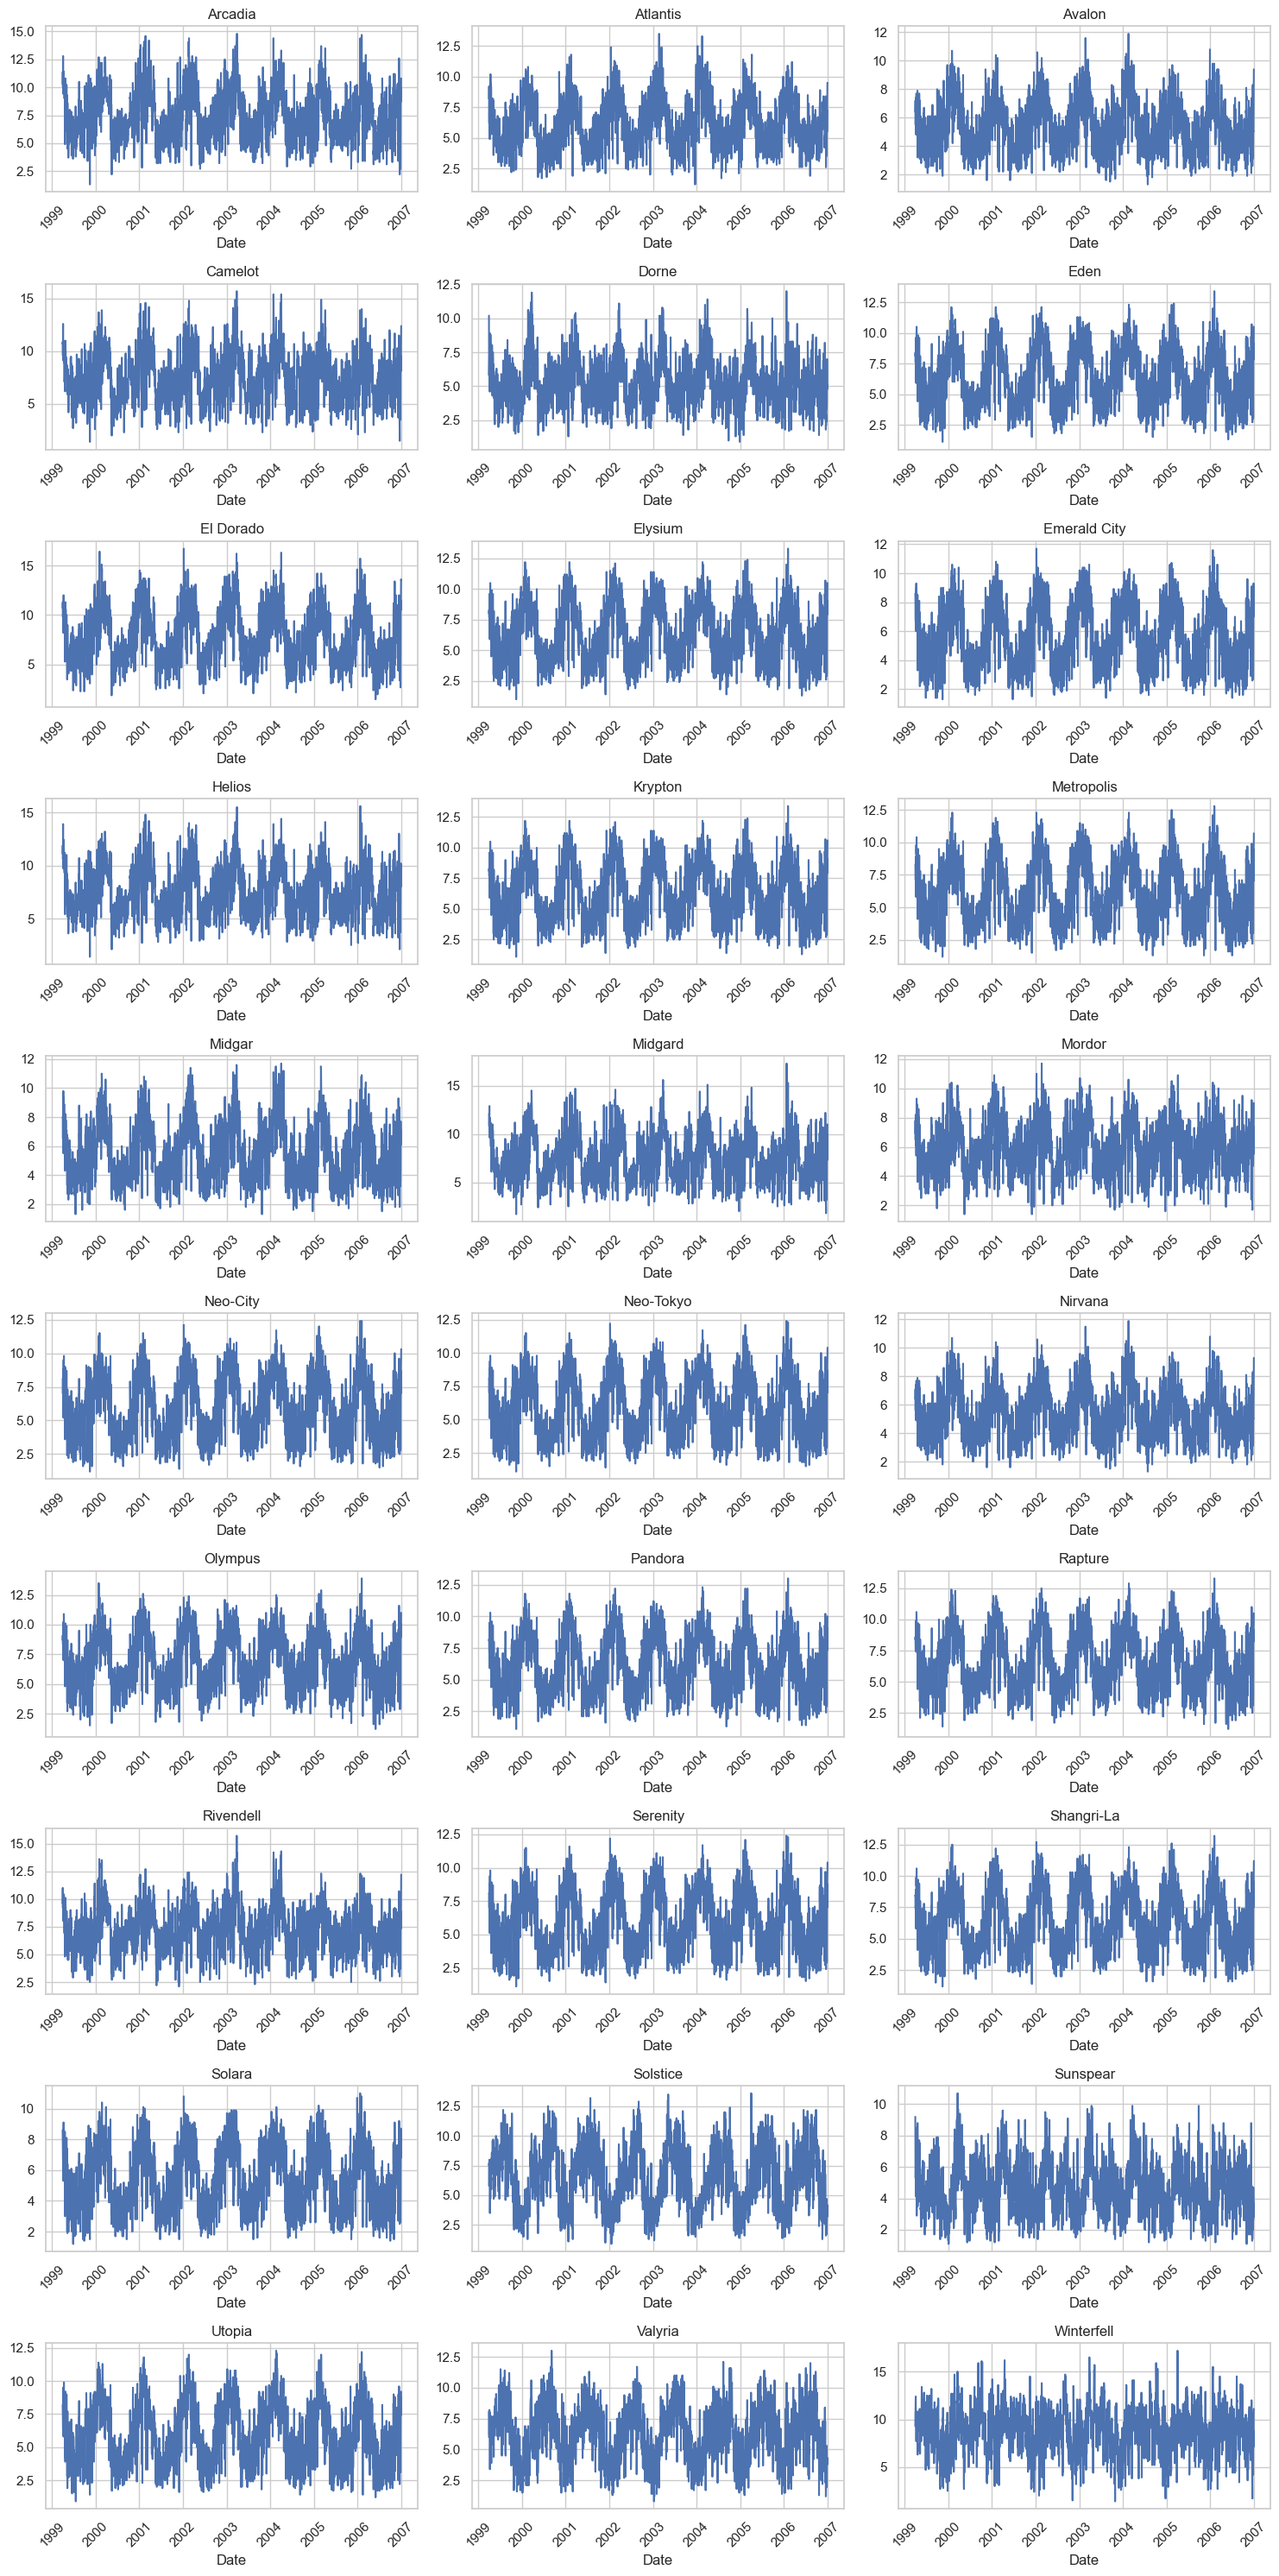

In [22]:
plot_all_kingdoms('Feels_Like_Temperature_Range')

#### 5. Radiation

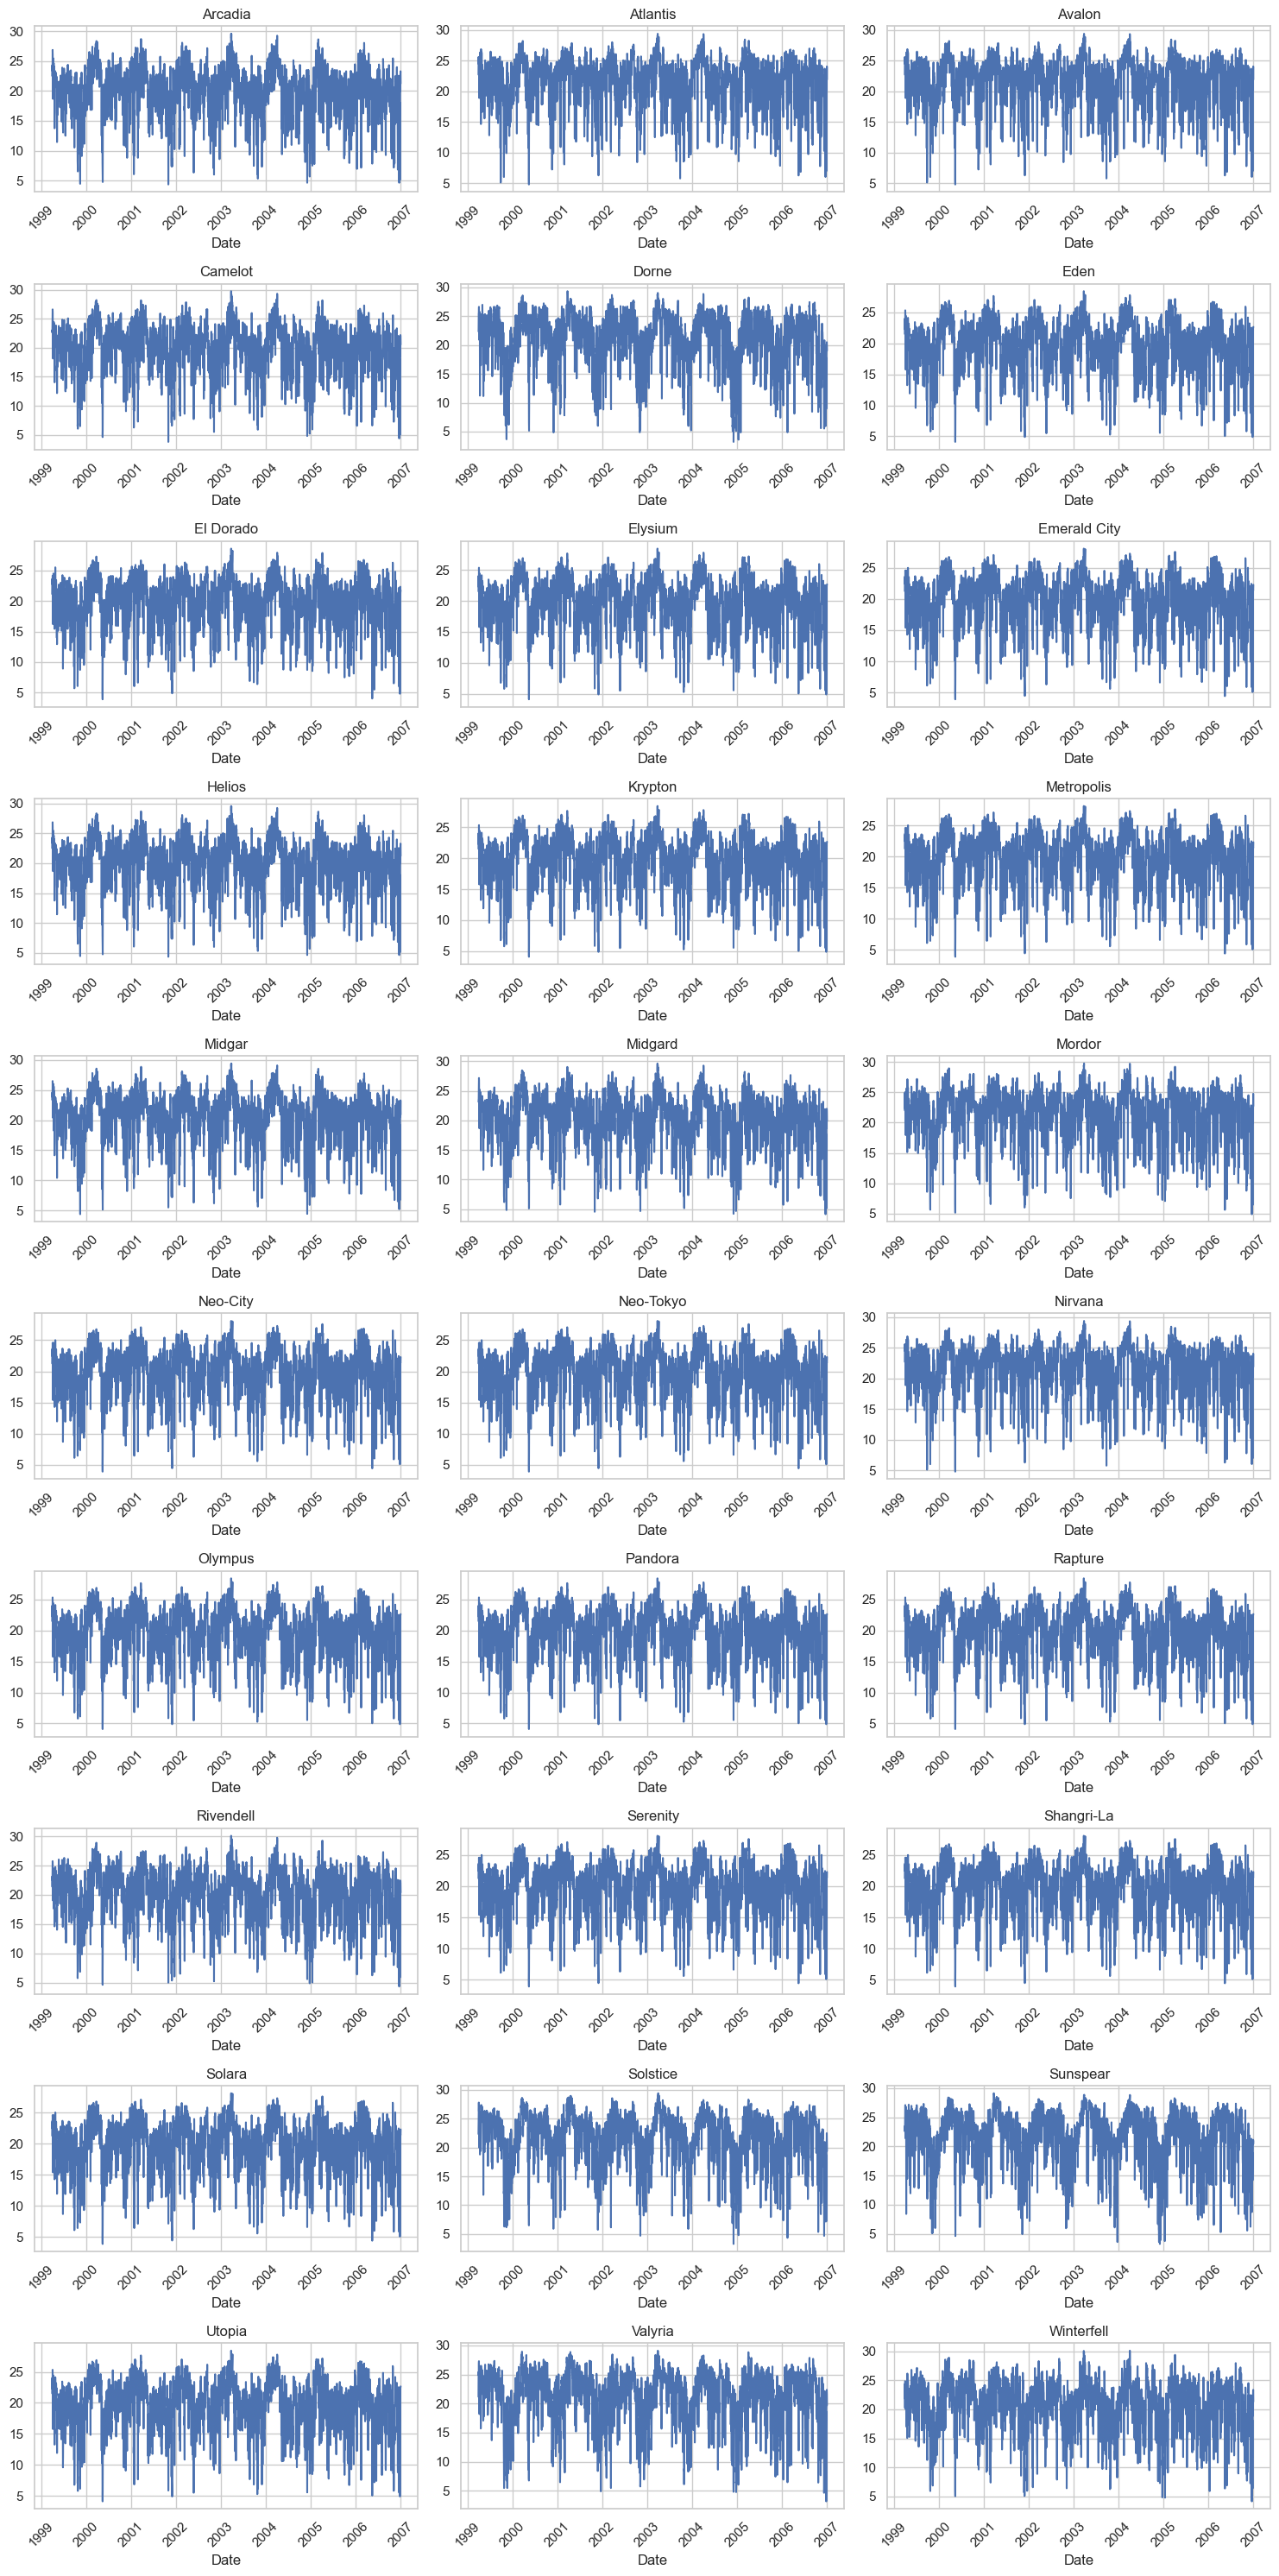

In [23]:
plot_all_kingdoms('Radiation')

#### 5. Rain_Amount

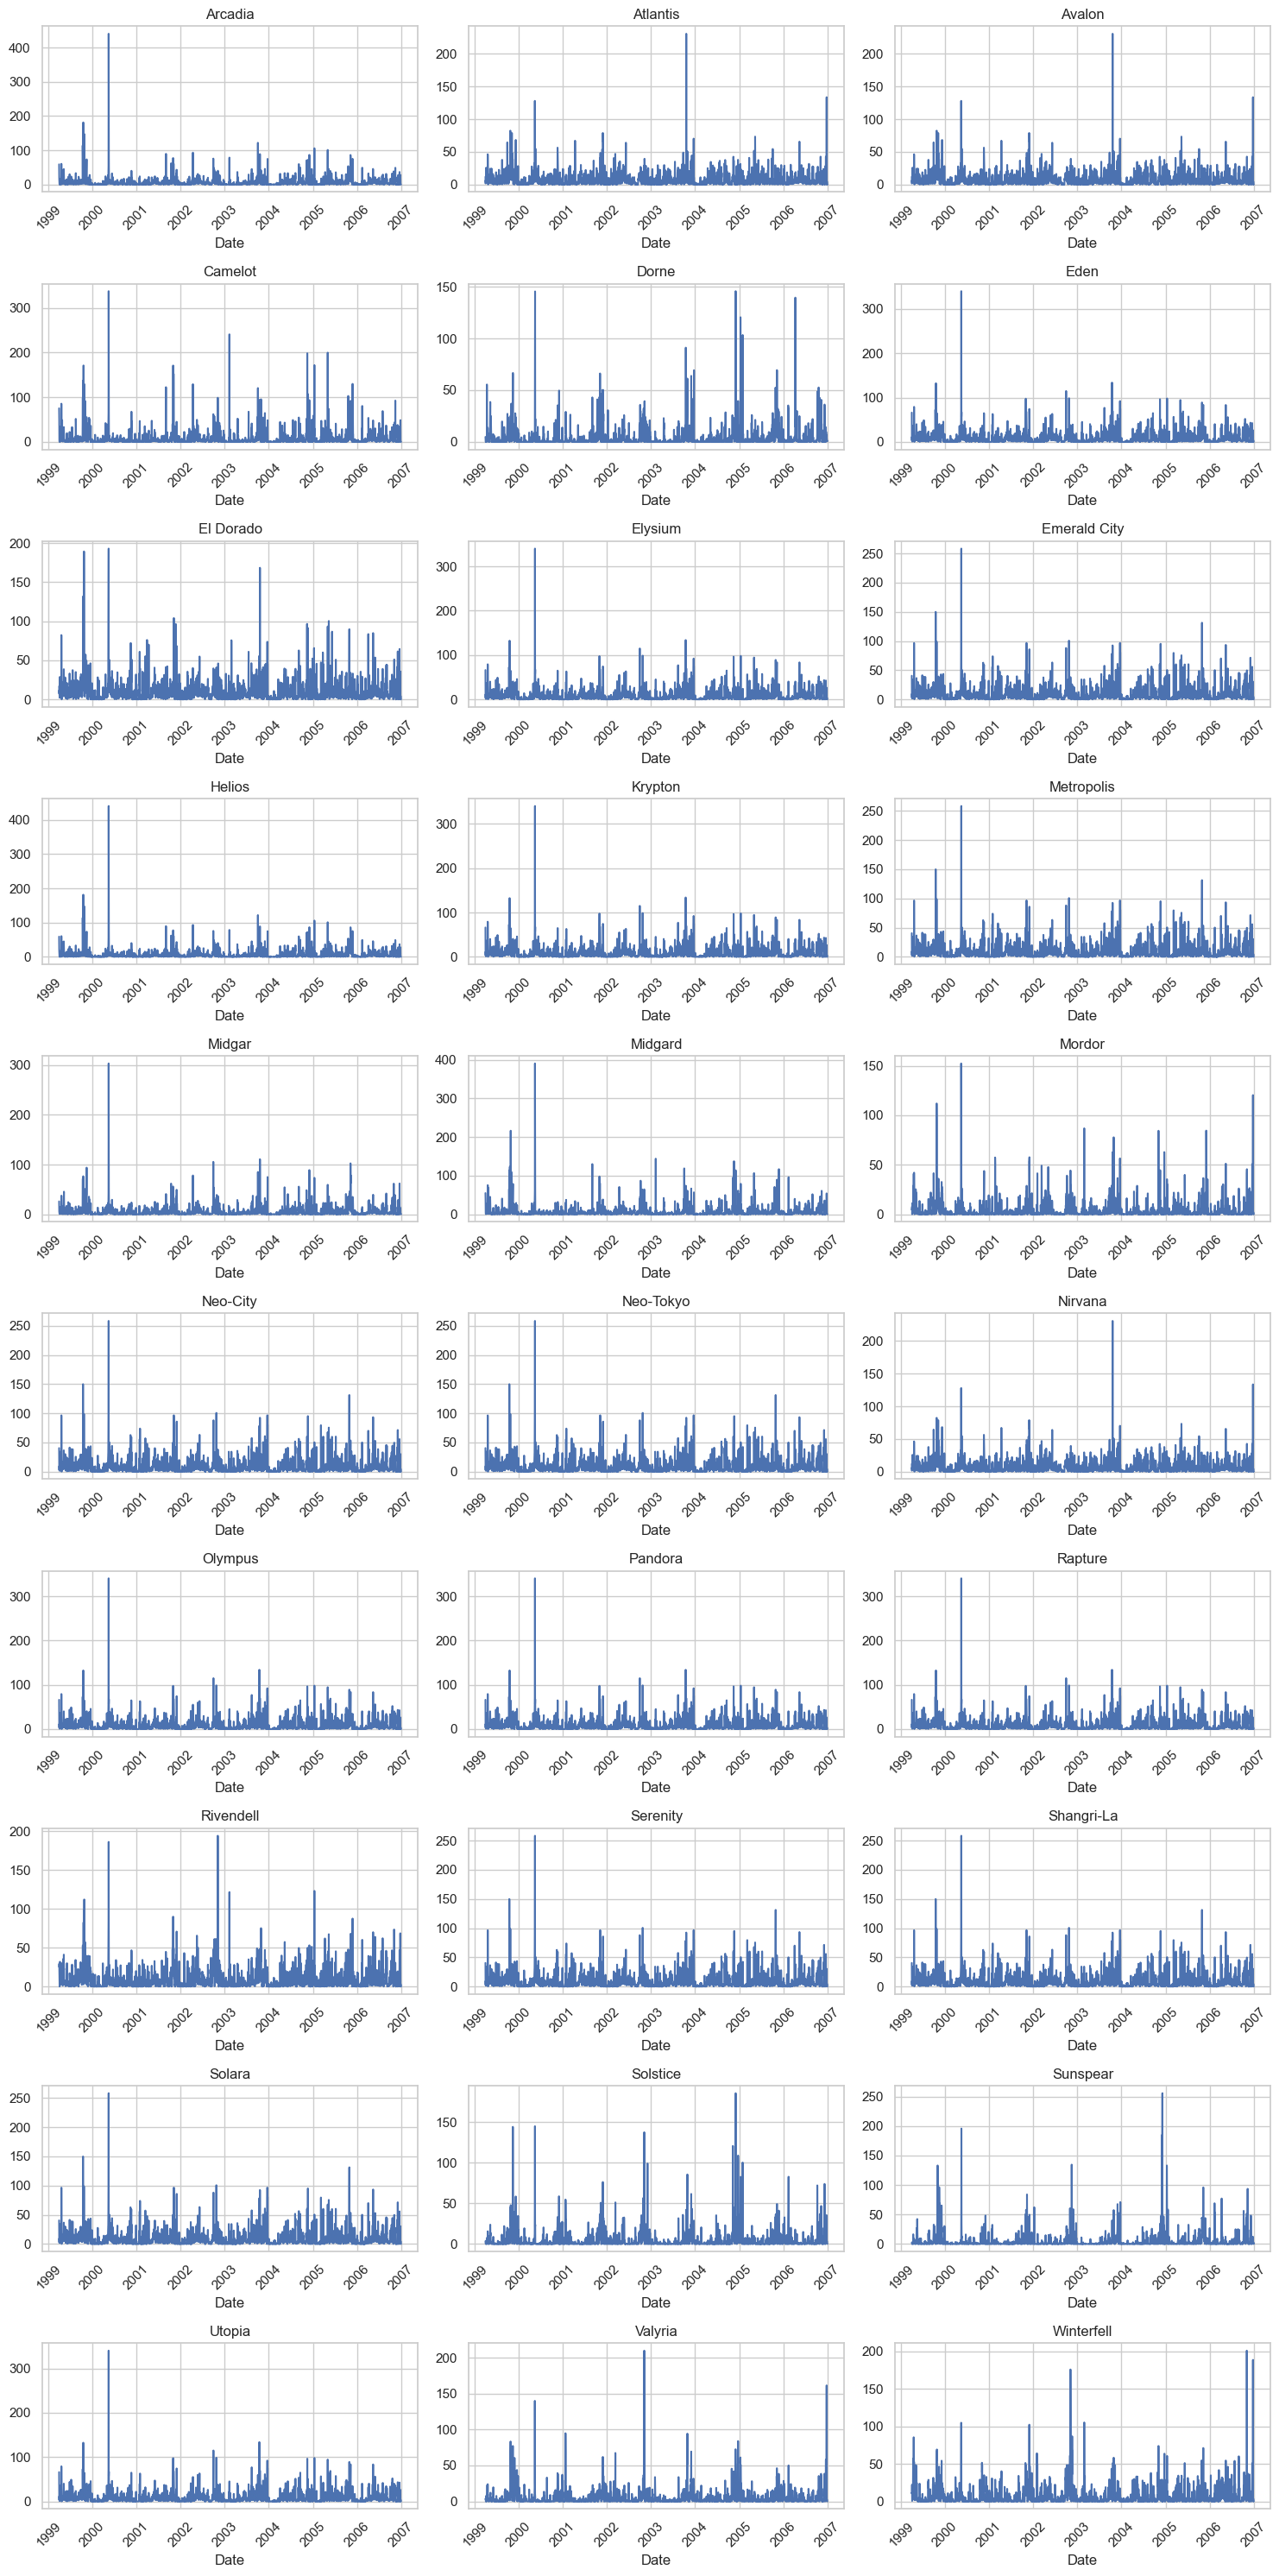

In [24]:
plot_all_kingdoms('Rain_Amount')

> The rain amount feature shows extreme outliers—values around 400 in Arcadia and Helios, and around 300 in several nearby regions. Interestingly, these spikes occur around the same time in certain years, and the affected kingdoms are geographically close. This suggests that these extreme values are not errors but likely represent real weather events, such as regional storms or cyclones.

#### 6. Rain_Duration

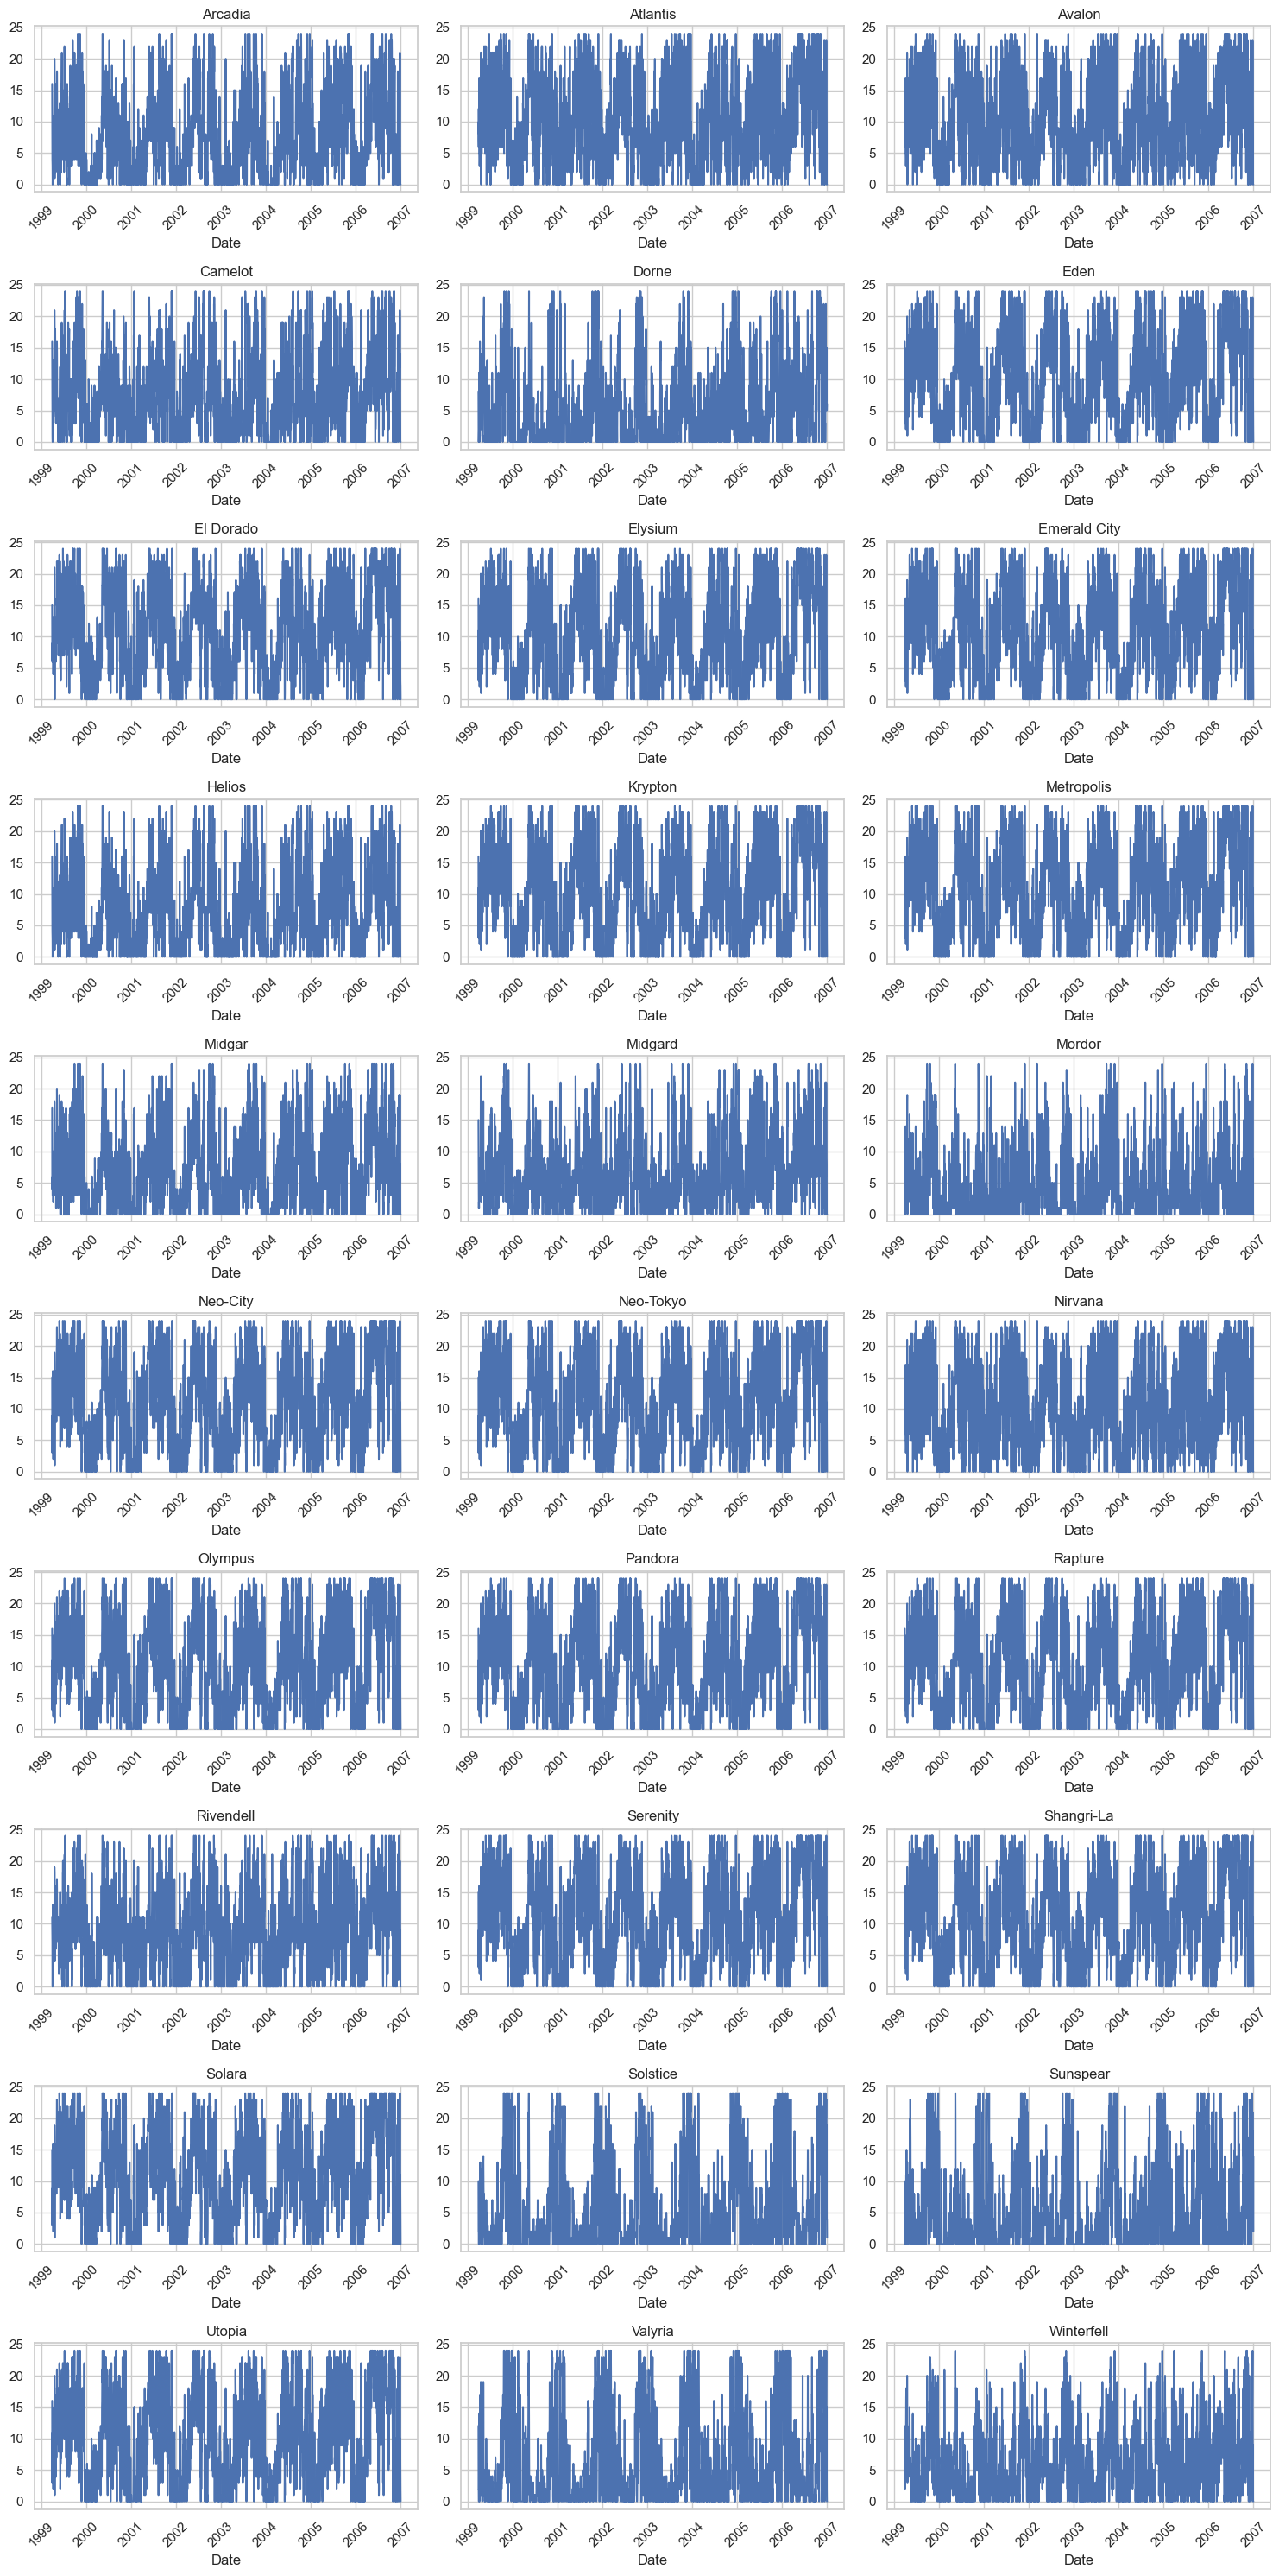

In [25]:
plot_all_kingdoms('Rain_Duration')

#### 7. Wind_Speed

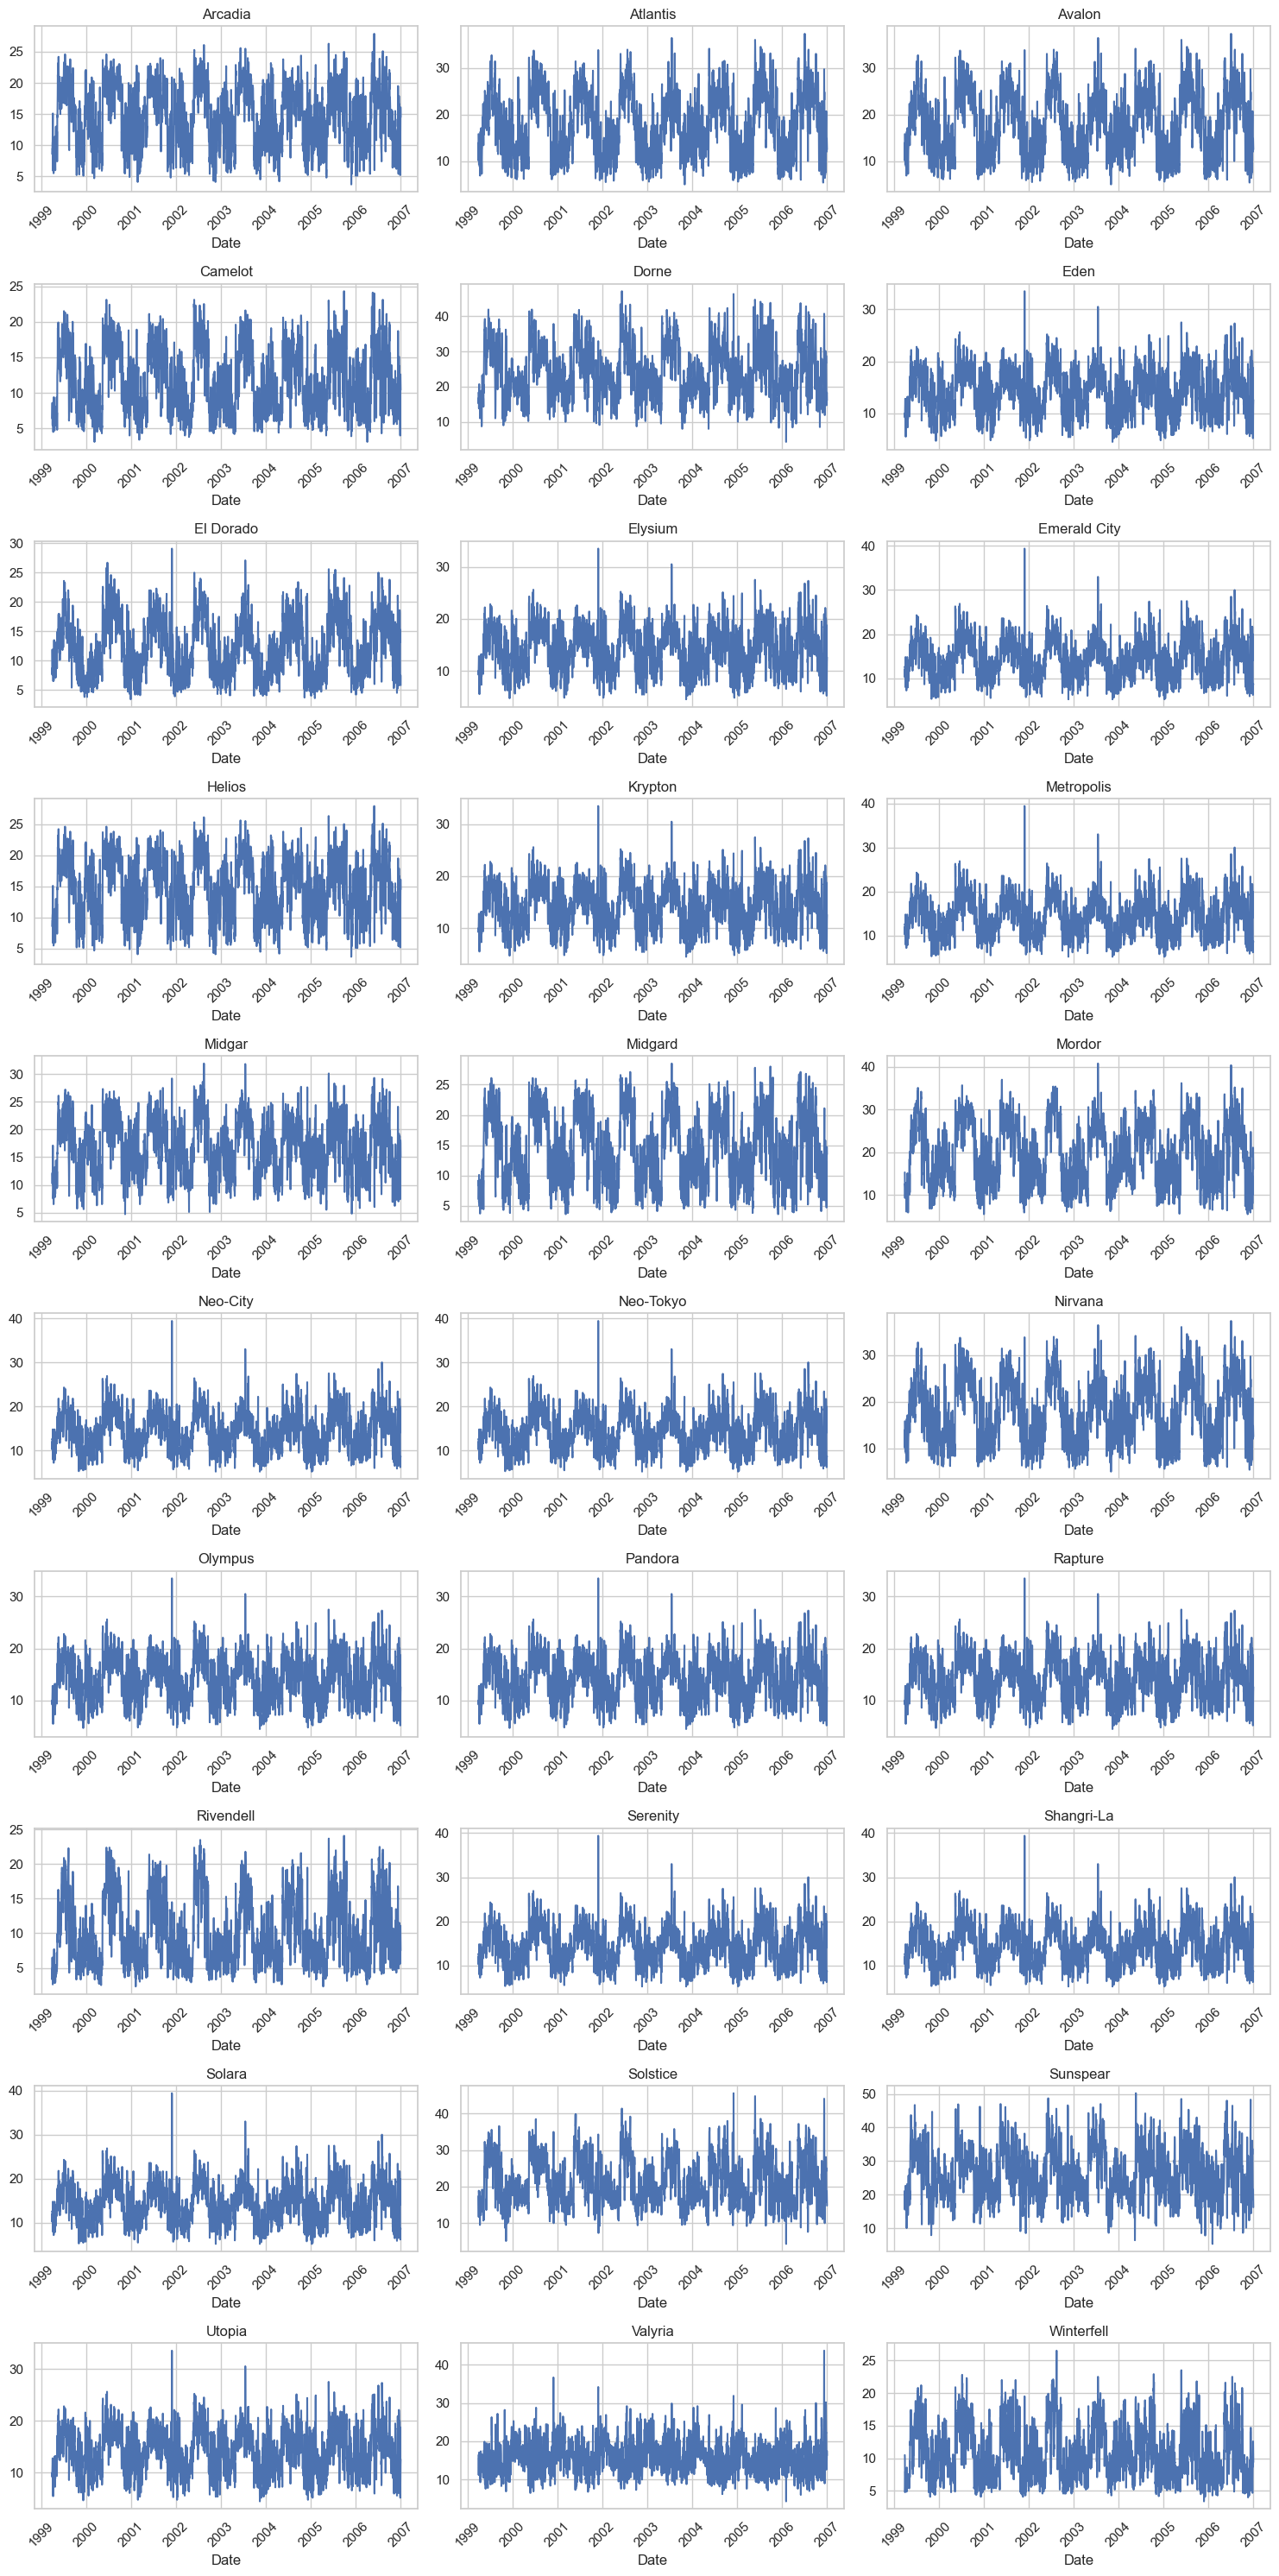

In [26]:
plot_all_kingdoms('Wind_Speed')

#### 8. Wind_Direction

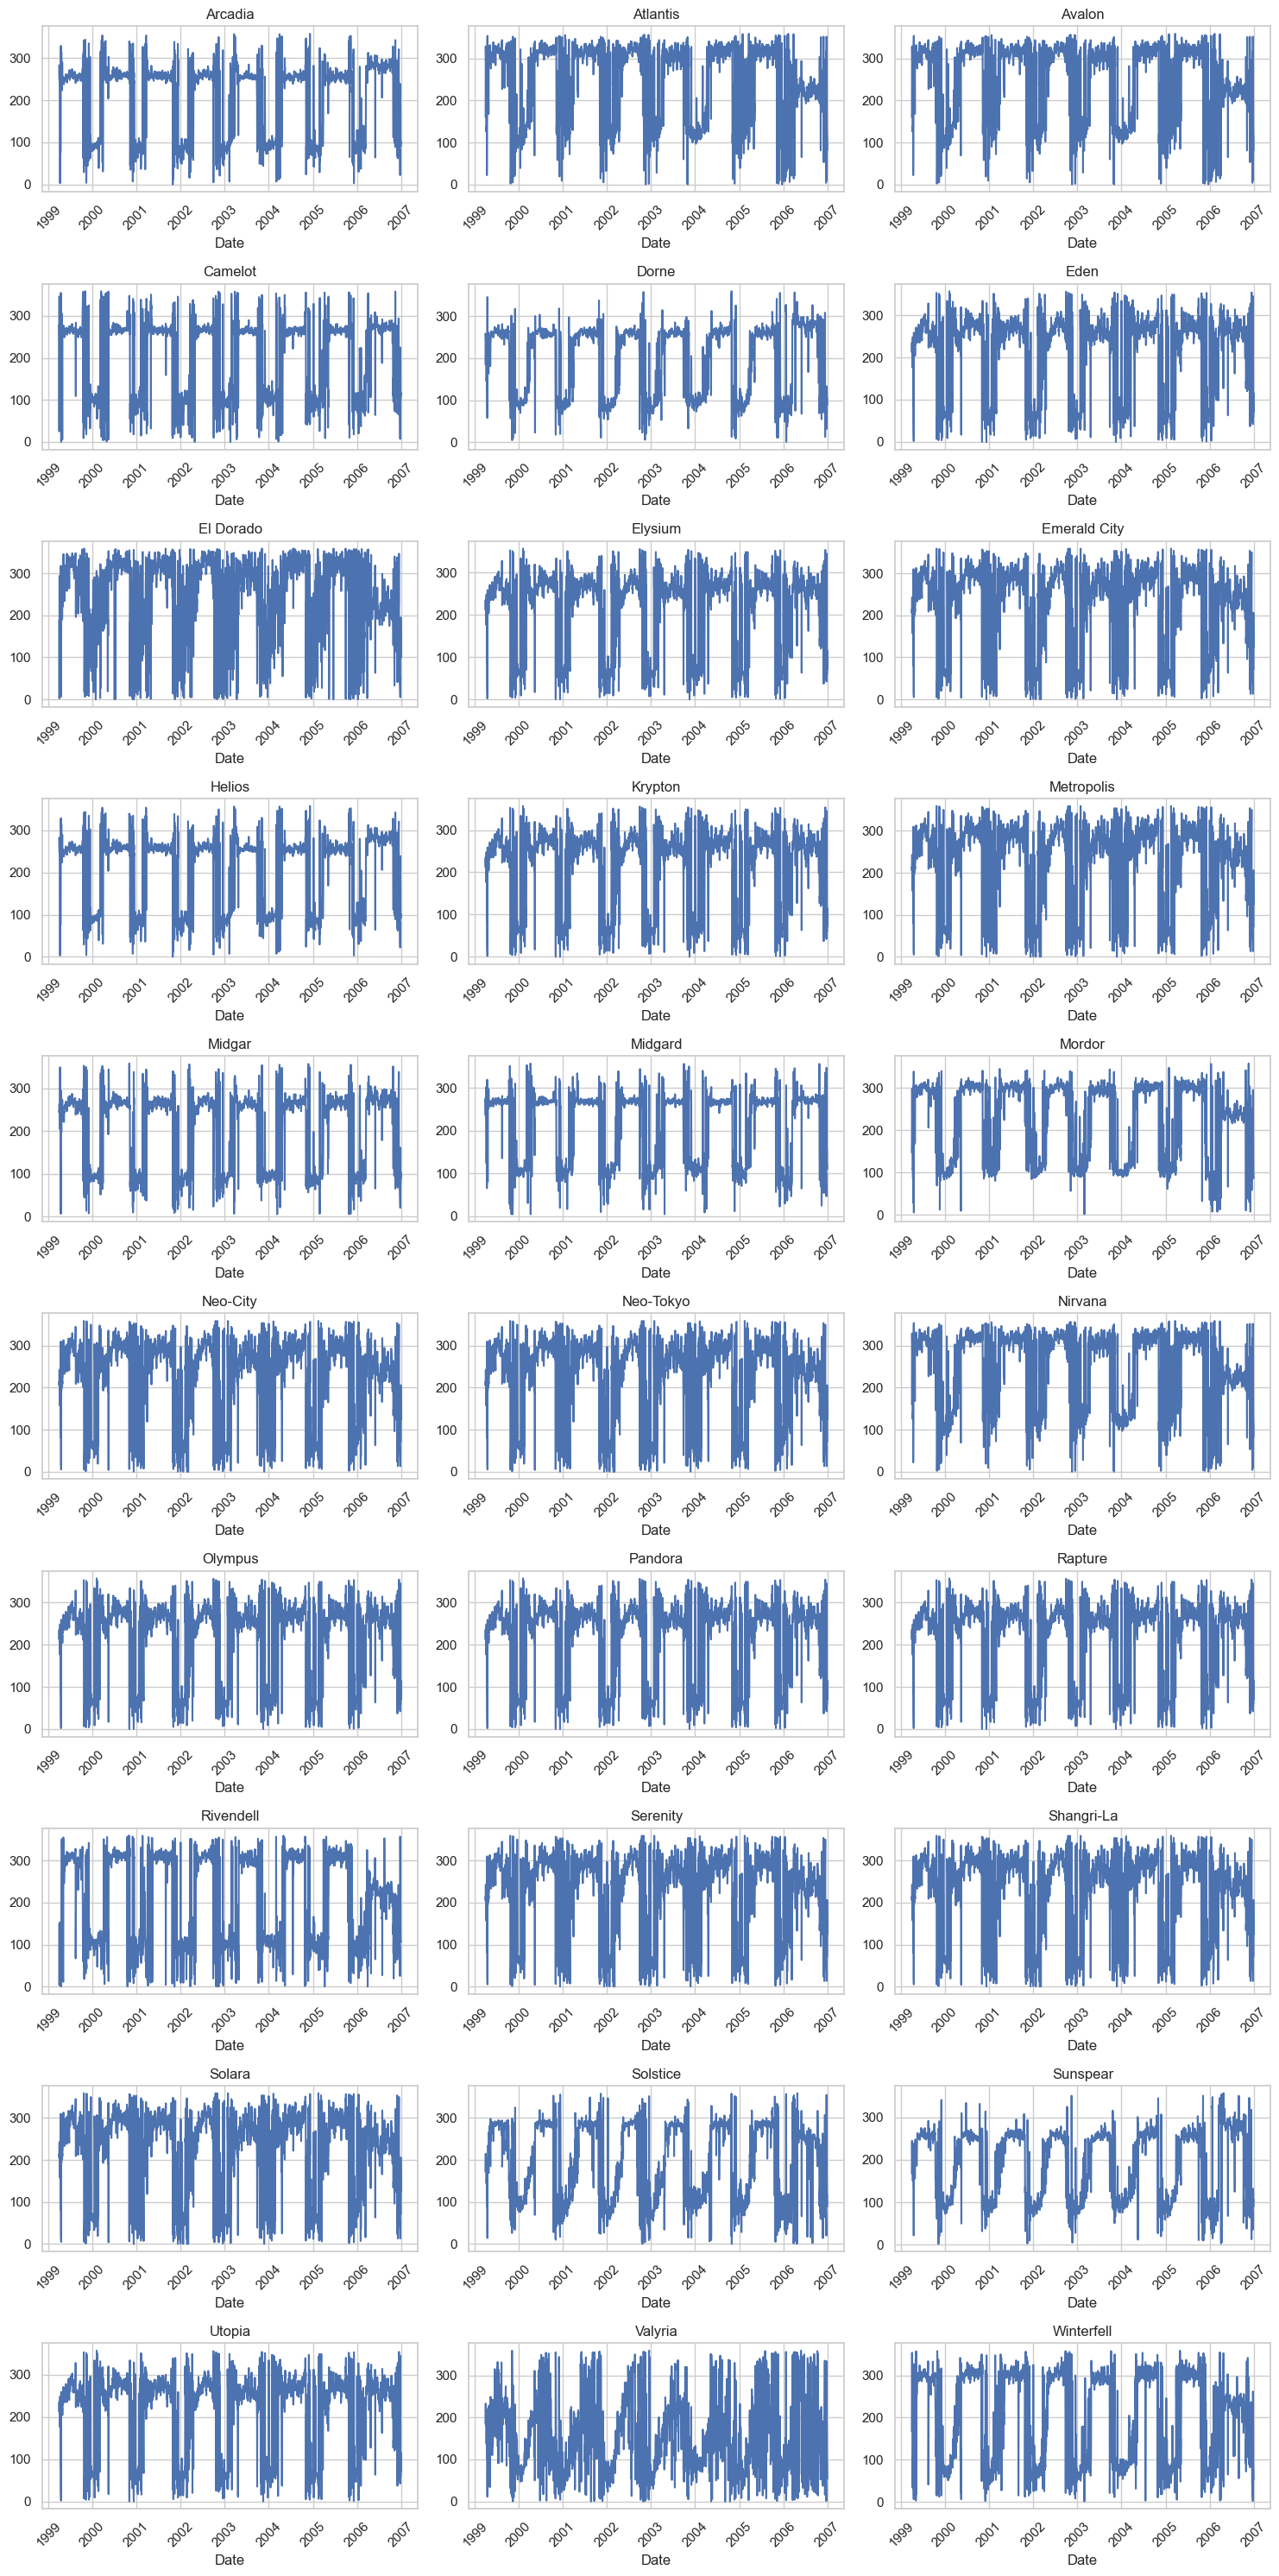

In [27]:
plot_all_kingdoms('Wind_Direction')

#### 9. Evapotranspiration

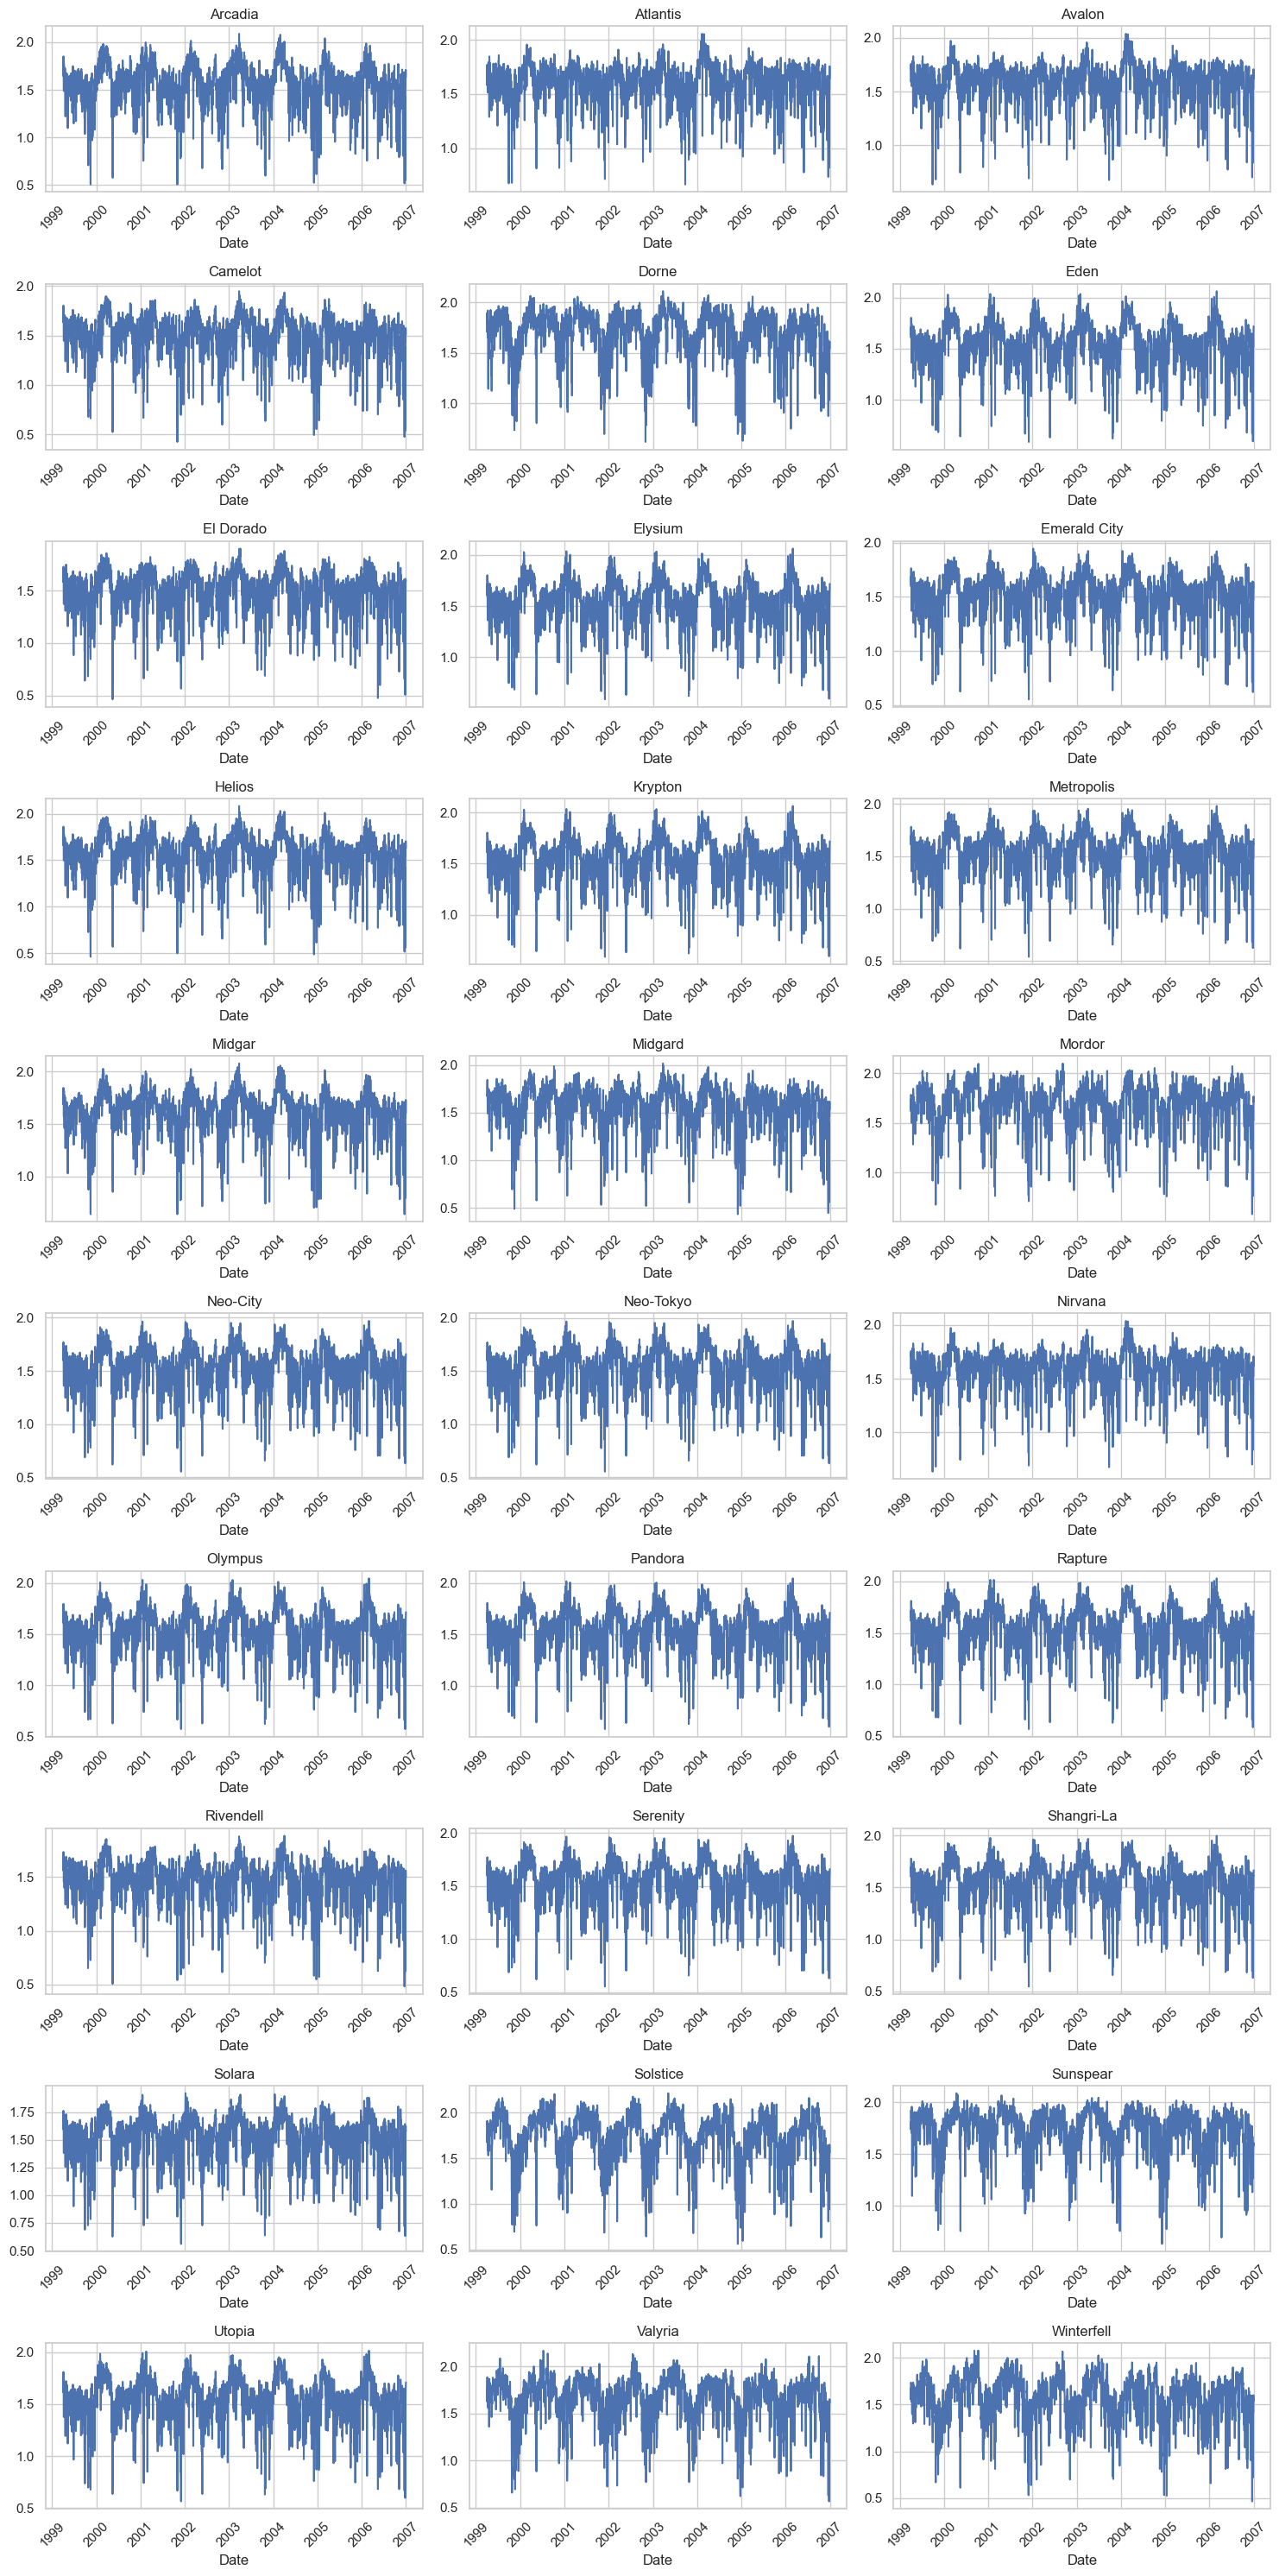

In [28]:
plot_all_kingdoms('Evapotranspiration')

### Fix Temperature Measurement Unit Issues

In [17]:
# Fix Temperature Measurement Unit Issues

# Define a function to convert Kelvin to Celsius
def kelvin_to_celsius(kelvin):
    return kelvin - 273.15

# Normalize the Avg_Temperature column to ensure all values are in Celsius
df['Avg_Temperature'] = df['Avg_Temperature'].apply(
    lambda x: kelvin_to_celsius(x) if x > 100 else x
)

# Normalize the Avg_Feels_Like_Temperature column to ensure all values are in Celsius
df['Avg_Feels_Like_Temperature'] = df['Avg_Feels_Like_Temperature'].apply(
    lambda x: kelvin_to_celsius(x) if x > 100 else x
)

In [18]:
df.describe()

ID          Year      latitude     longitude  \
count  84960.000000  84960.000000  84960.000000  84960.000000   
mean   42480.500000   2002.610876     24.003334    -37.266665   
min        1.000000   1999.000000     22.880000    -37.729980   
25%    21240.750000   2001.000000     23.680003    -37.630006   
50%    42480.500000   2003.000000     23.780002    -37.530000   
75%    63720.250000   2005.000000     24.280002    -37.130006   
max    84960.000000   2006.000000     26.580005    -35.729980   
std    24525.983772      2.239331      0.798622      0.488873   

       Avg_Temperature  Avg_Feels_Like_Temperature  Temperature_Range  \
count     84960.000000                84960.000000       84960.000000   
mean         26.340751                   30.475375           5.345287   
min          17.200000                   16.300000           0.500000   
25%          25.700000                   29.500000           3.800000   
50%          26.500000                   30.900000           5.100000   
75%          27.400000                   32.000000           6.500000   
max          31.500000                   37.400000          15.400000   
std           1.827013                    2.503309           1.977739   

       Feels_Like_Temperature_Range     Radiation   Rain_Amount  \
count                  84960.000000  84960.000000  84960.000000   
mean                       6.361224     20.338598      7.723850   
min                        0.800000      3.190000      0.000000   
25%                        4.500000     18.070000      0.520000   
50%                        6.200000     20.960000      3.380000   
75%                        8.000000     23.300000      9.490000   
max                       17.300000     30.100000    440.440000   
std                        2.371880      4.118938     13.477186   

       Rain_Duration    Wind_Speed  Wind_Direction  Evapotranspiration  \
count   84960.000000  84960.000000    84960.000000        84960.000000   
mean        8.895680     15.629291      215.831297            1.568724   
min         0.000000      2.300000        0.000000            0.425268   
25%         2.000000     11.100000      119.000000            1.451614   
50%         8.000000     15.100000      255.000000            1.589235   
75%        15.000000     19.000000      286.000000            1.715598   
max        24.000000     50.200000      359.000000            2.212660   
std         7.231531      6.198760       93.917858            0.219856   

                                date  
count                          84960  
mean   2003-02-14 11:59:59.999999744  
min              1999-04-01 00:00:00  
25%              2001-03-08 18:00:00  
50%              2003-02-14 12:00:00  
75%              2005-01-22 06:00:00  
max              2006-12-31 00:00:00  
std                              NaN

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84960 entries, 0 to 84959
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            84960 non-null  int64         
 1   Year                          84960 non-null  int64         
 2   Month                         84960 non-null  object        
 3   Day                           84960 non-null  object        
 4   kingdom                       84960 non-null  object        
 5   latitude                      84960 non-null  float64       
 6   longitude                     84960 non-null  float64       
 7   Avg_Temperature               84960 non-null  float64       
 8   Avg_Feels_Like_Temperature    84960 non-null  float64       
 9   Temperature_Range             84960 non-null  float64       
 10  Feels_Like_Temperature_Range  84960 non-null  float64       
 11  Radiation                   

### Remove the not important features
> ID, date_string, date
> ml models don't work well with date time data type hence they are converted back to their original state.

In [20]:
# Remove the ID column
df = df.drop(columns=['ID'])

In [21]:
df = df.drop(columns=['date_string'])
df = df.drop(columns=['date'])

In [22]:
print(df[['kingdom', 'latitude', 'longitude']])

          kingdom   latitude  longitude
0         Arcadia  24.280002 -37.229980
1        Atlantis  22.979999 -37.329990
2          Avalon  22.880000 -37.130006
3         Camelot  24.180003 -36.929994
4           Dorne  25.780002 -37.530000
...           ...        ...        ...
84955    Solstice  25.479998 -36.329990
84956    Sunspear  26.580005 -37.530000
84957      Utopia  23.979999 -37.630006
84958     Valyria  24.280002 -35.729980
84959  Winterfell  23.979999 -36.429994

[84960 rows x 3 columns]


In [23]:
# Converting year, month and date back to its original state

# Ensure Year, Month, Day are acceptable integers
df["Year"] = df["Year"].astype(int)
df["Month"] = df["Month"].astype(int)
df["Day"] = df["Day"].astype(int)

df["Year"] = df['Year'] - 1998
df["Year"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [24]:
df.head(2)

Year  Month  Day   kingdom   latitude  longitude  Avg_Temperature  \
0     1      4    1   Arcadia  24.280002  -37.22998             25.5   
1     1      4    1  Atlantis  22.979999  -37.32999             26.5   

   Avg_Feels_Like_Temperature  Temperature_Range  \
0                        30.5                8.5   
1                        32.0                5.9   

   Feels_Like_Temperature_Range  Radiation  Rain_Amount  Rain_Duration  \
0                          10.3      22.52        58.89             16   
1                           8.2      22.73        11.83             12   

   Wind_Speed  Wind_Direction  Evapotranspiration  
0         8.6             283            1.648659  
1        15.8             161            1.583094

### Plotting the time series of one year to undestand the seasonal trend

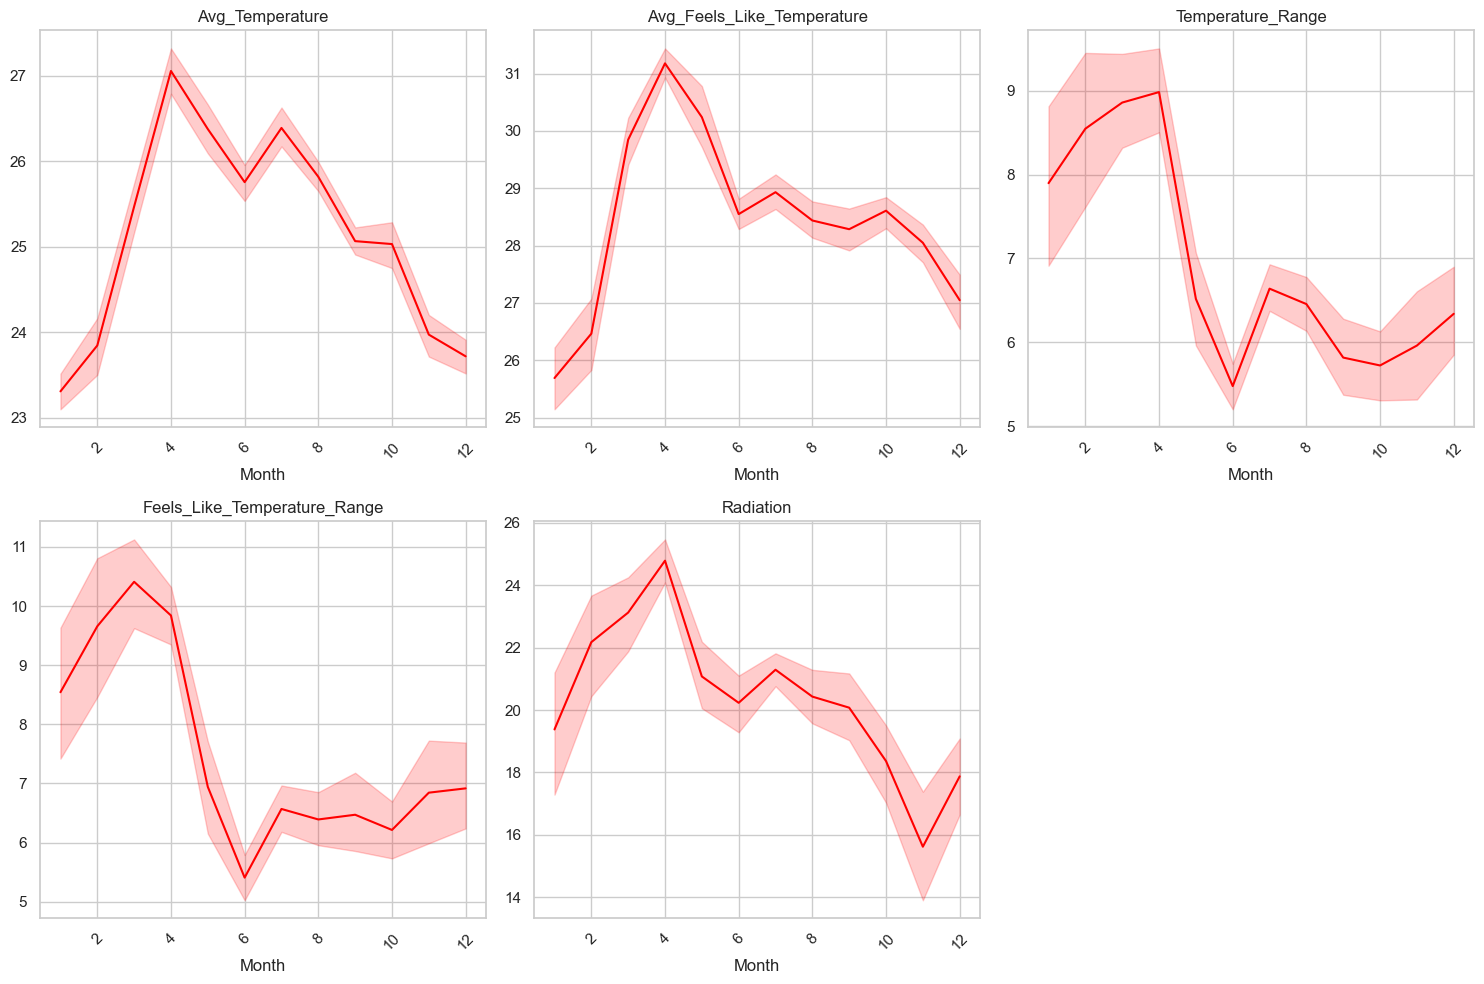

In [25]:
# Choose a specific kingdom to plot
kingdom_name = "Midgard"

# Filter the DataFrame for the chosen kingdom and for the year, where year == 3 (assuming 2023)
kingdom_data = df[(df['kingdom'] == kingdom_name) & (df['Year'] == 3)]

# Create a figure and axes for 5 subplots arranged in 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

# Define the features to plot
features = [
    'Avg_Temperature',
    'Avg_Feels_Like_Temperature',
    'Temperature_Range',
    'Feels_Like_Temperature_Range',
    'Radiation'
]

# Loop through the features and create a subplot for each
for i, feature in enumerate(features):
    sns.lineplot(data=kingdom_data, x='Month', y=feature, ax=axs[i], color='red')  # Set color to red
    axs[i].set_title(feature)  # Use the feature name as the title
    axs[i].set_ylabel('')  # Leave y-axis label empty
    axs[i].set_xlabel('Month')
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45)

# Hide any unused subplots
for j in range(len(features), len(axs)):
    axs[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

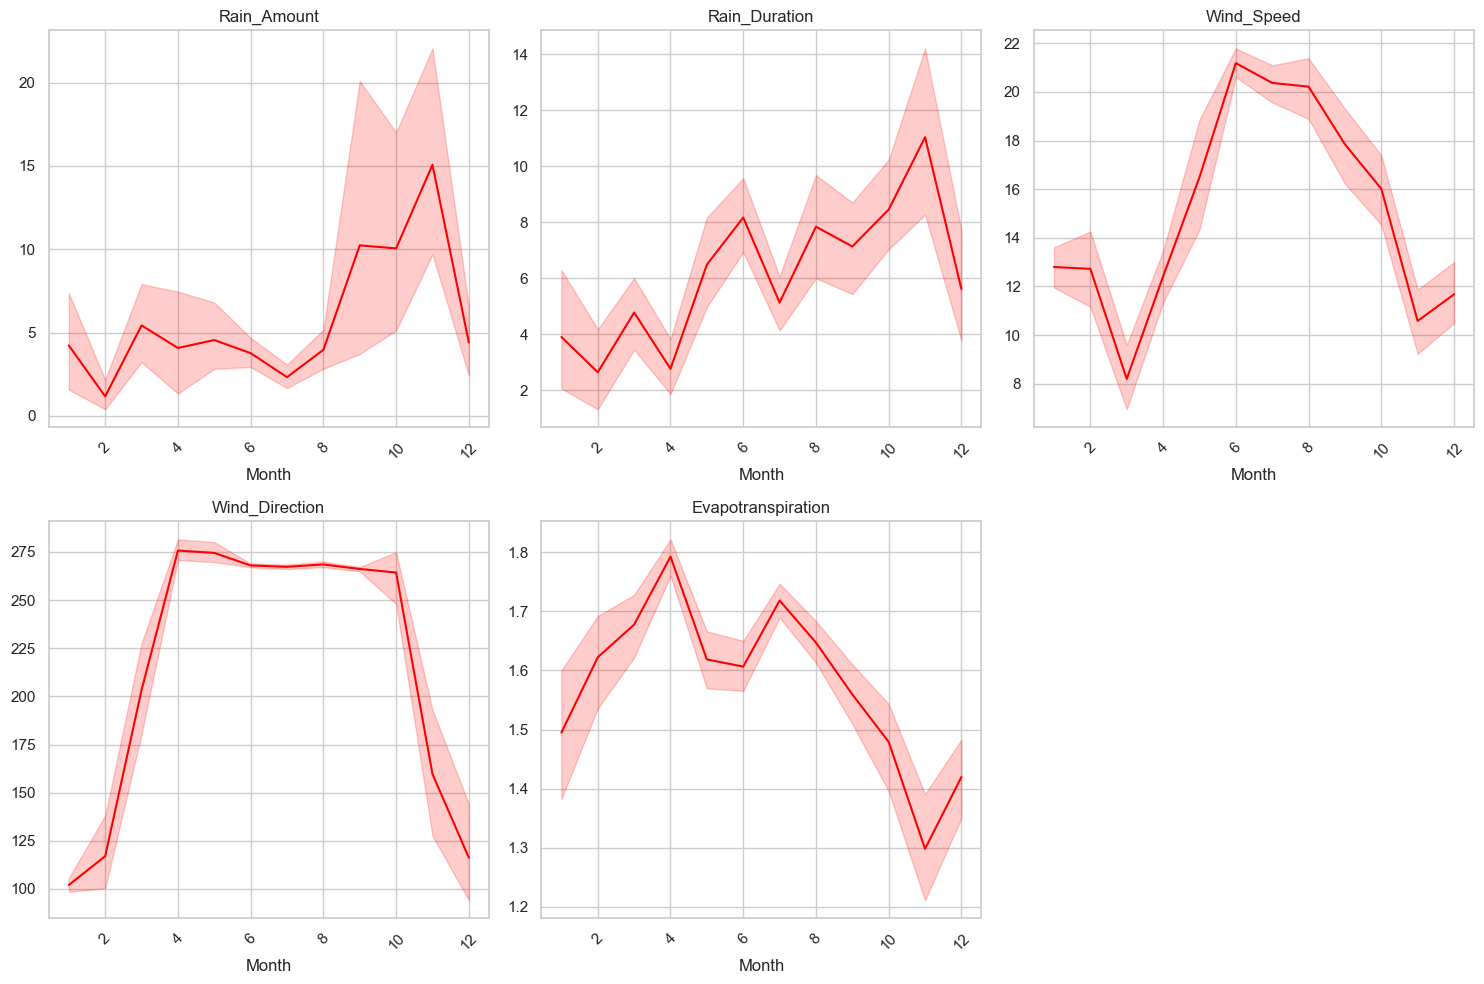

In [26]:
# Choose a specific kingdom to plot
kingdom_name = "Midgard"

# Filter the DataFrame for the chosen kingdom and for the year, where year == 3 (assuming 2023)
kingdom_data = df[(df['kingdom'] == kingdom_name) & (df['Year'] == 3)]

# Create a figure and axes for 5 subplots arranged in 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

# Define the features to plot
# Define the new features to plot
features = [
    'Rain_Amount',
    'Rain_Duration',
    'Wind_Speed',
    'Wind_Direction',
    'Evapotranspiration'
]

# Loop through the features and create a subplot for each
for i, feature in enumerate(features):
    sns.lineplot(data=kingdom_data, x='Month', y=feature, ax=axs[i], color='red')  # Set color to red
    axs[i].set_title(feature)  # Use the feature name as the title
    axs[i].set_ylabel('')  # Leave y-axis label empty
    axs[i].set_xlabel('Month')
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45)

# Hide any unused subplots
for j in range(len(features), len(axs)):
    axs[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

> Weather Data Analysis and Sliding Window Selection

**Observed Seasonal Patterns**

The weather data exhibits distinct seasonal variations across multiple meteorological variables:

- **Precipitation**:
  - Rain amount and duration peak during months 10-12 (autumn/early winter)
  - Secondary rainfall peak around months 6-8 (summer)
  - Lowest rainfall in months 2-3 (late winter/early spring)

- **Wind Conditions**:
  - Wind speed reaches maximum values during months 6-8 (summer)
  - Wind direction shows dramatic shift around month 4, maintaining stable direction until months 10-11
  - Direction values suggest predominantly westerly winds during summer/autumn months

- **Temperature Metrics**:
  - Maximum temperatures occur around month 4-5 (spring)
  - Secondary peak around month 8 (late summer)
  - Temperature range is highest in months 3-5 (spring)
  - "Feels like" temperature closely follows actual temperature patterns but with greater range

- **Radiation and Evapotranspiration**:
  - Radiation peaks in months 4-5, aligned with temperature maximums
  - Evapotranspiration follows similar pattern, reflecting the relationship between solar radiation, temperature, and moisture transfer

**Sliding Window Size Recommendations**

Based on the observed seasonal patterns:

| Forecasting Goal | Recommended Window Size | Justification |
|------------------|-------------------------|---------------|
| Short-term (7-14 days) | 30 days (≈ 30 records) | Captures immediate trends while maintaining recent context |
| Medium-term (1-2 months) | 60-90 days (≈ 60-90 records) | Captures progression within a single season |
| Seasonal transitions | 90-120 days (≈ 90-120 records) | Encompasses complete seasonal transitions |

**Implementation Considerations**

- Complete weather pattern shifts typically occur over 2-3 month periods
- Most variables don't change drastically within a 30-day period except during transition months
- Too small a window (< 14 days) risks missing important developing patterns
- Too large a window (> 180 days) may introduce irrelevant opposing seasonal patterns

### Kingdoms according to Location
> Decided to remove the longitude and latitude features, instead according to the placement of the kingdoms according to the longitudes and latitude a number is given to kingdoms which gives insight into where each kingdom is located

In [27]:
# First, aggregate by kingdom to get exactly 30 rows
kingdom_df = df.groupby('kingdom').agg({
    'latitude': 'mean',
    'longitude': 'mean'
}).reset_index()

# Extract coordinates for distance calculation
coords = kingdom_df[['latitude', 'longitude']].values

# Create a distance matrix
n = len(coords)
dist_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        # Calculate Euclidean distance between points
        dist_matrix[i, j] = distance.euclidean(coords[i], coords[j])

# Use hierarchical clustering to create a geography-based ordering
Z = linkage(distance.squareform(dist_matrix), method='ward')

# Choose number of clusters based on your domain knowledge
# Looking at your map, maybe 5-6 regional clusters would be appropriate
n_clusters = 8  # Adjust as needed based on your map
kingdom_df['cluster'] = fcluster(Z, n_clusters, criterion='maxclust')

# Order clusters based on their centroids' positions (west to east)
cluster_centroids = kingdom_df.groupby('cluster').agg({
    'longitude': 'mean'
}).sort_values('longitude')

# Create ordering map
cluster_order = {cluster: i for i, cluster in enumerate(cluster_centroids.index)}
kingdom_df['cluster_order'] = kingdom_df['cluster'].map(cluster_order)

# Sort kingdoms: first by cluster, then by longitude within cluster
kingdom_df = kingdom_df.sort_values(['cluster_order', 'longitude'])

# Assign the final kingdom_id
kingdom_df['kingdom_id'] = range(len(kingdom_df))

# Create a mapping to apply to your original dataframe
kingdom_id_map = kingdom_df.set_index('kingdom')['kingdom_id'].to_dict()

# Apply the mapping to your original dataframe
df['kingdom_id'] = df['kingdom'].map(kingdom_id_map)

# If you want to see the ordered kingdoms
ordered_kingdoms = kingdom_df[['kingdom', 'kingdom_id']].sort_values('kingdom_id')
print(ordered_kingdoms)

         kingdom  kingdom_id
12        Midgar           0
5           Eden           1
7        Elysium           2
10       Krypton           3
11    Metropolis           4
15      Neo-City           5
16     Neo-Tokyo           6
19       Pandora           7
22      Serenity           8
23    Shangri-La           9
27        Utopia          10
8   Emerald City          11
18       Olympus          12
20       Rapture          13
24        Solara          14
6      El Dorado          15
21     Rivendell          16
4          Dorne          17
26      Sunspear          18
1       Atlantis          19
2         Avalon          20
17       Nirvana          21
0        Arcadia          22
9         Helios          23
3        Camelot          24
13       Midgard          25
14        Mordor          26
25      Solstice          27
29    Winterfell          28
28       Valyria          29


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84960 entries, 0 to 84959
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          84960 non-null  int64  
 1   Month                         84960 non-null  int64  
 2   Day                           84960 non-null  int64  
 3   kingdom                       84960 non-null  object 
 4   latitude                      84960 non-null  float64
 5   longitude                     84960 non-null  float64
 6   Avg_Temperature               84960 non-null  float64
 7   Avg_Feels_Like_Temperature    84960 non-null  float64
 8   Temperature_Range             84960 non-null  float64
 9   Feels_Like_Temperature_Range  84960 non-null  float64
 10  Radiation                     84960 non-null  float64
 11  Rain_Amount                   84960 non-null  float64
 12  Rain_Duration                 84960 non-null  int64  
 13  W

In [29]:
df = df.drop(columns=['kingdom','latitude', 'longitude', 'Avg_Feels_Like_Temperature', 'Temperature_Range', 'Feels_Like_Temperature_Range',  'Rain_Duration', 'Evapotranspiration'])

df.columns

Index(['Year', 'Month', 'Day', 'Avg_Temperature', 'Radiation', 'Rain_Amount',
       'Wind_Speed', 'Wind_Direction', 'kingdom_id'],
      dtype='object')

In [30]:
# Step 1: Rename the column
df.rename(columns={'kingdom_id': 'kingdom'}, inplace=True)

# Step 2: Reorder the columns
# Create a new column order
new_order = ['Year', 'Month', 'Day', 'kingdom', 'Avg_Temperature', 'Radiation', 'Rain_Amount', 'Wind_Speed', 'Wind_Direction']

# Reindex the DataFrame
df = df[new_order]

# Display the updated DataFrame
df.columns

Index(['Year', 'Month', 'Day', 'kingdom', 'Avg_Temperature', 'Radiation',
       'Rain_Amount', 'Wind_Speed', 'Wind_Direction'],
      dtype='object')

In [31]:
type(df)

pandas.core.frame.DataFrame

In [32]:
df['Year'] = df["Year"] + 1998

In [33]:
print(df['Year'].describe())

count    84960.000000
mean      2002.610876
std          2.239331
min       1999.000000
25%       2001.000000
50%       2003.000000
75%       2005.000000
max       2006.000000
Name: Year, dtype: float64


In [34]:
df.describe()

Year         Month           Day       kingdom  \
count  84960.000000  84960.000000  84960.000000  84960.000000   
mean    2002.610876      6.666667     15.735876     14.500000   
std        2.239331      3.402793      8.802867      8.655492   
min     1999.000000      1.000000      1.000000      0.000000   
25%     2001.000000      4.000000      8.000000      7.000000   
50%     2003.000000      7.000000     16.000000     14.500000   
75%     2005.000000     10.000000     23.000000     22.000000   
max     2006.000000     12.000000     31.000000     29.000000   

       Avg_Temperature     Radiation   Rain_Amount    Wind_Speed  \
count     84960.000000  84960.000000  84960.000000  84960.000000   
mean         26.340751     20.338598      7.723850     15.629291   
std           1.827013      4.118938     13.477186      6.198760   
min          17.200000      3.190000      0.000000      2.300000   
25%          25.700000     18.070000      0.520000     11.100000   
50%          26.500000     20.960000      3.380000     15.100000   
75%          27.400000     23.300000      9.490000     19.000000   
max          31.500000     30.100000    440.440000     50.200000   

       Wind_Direction  
count    84960.000000  
mean       215.831297  
std         93.917858  
min          0.000000  
25%        119.000000  
50%        255.000000  
75%        286.000000  
max        359.000000

In [35]:
df.head()

Year  Month  Day  kingdom  Avg_Temperature  Radiation  Rain_Amount  \
0  1999      4    1       22             25.5      22.52        58.89   
1  1999      4    1       19             26.5      22.73        11.83   
2  1999      4    1       20             26.3      22.73        11.83   
3  1999      4    1       24             24.0      22.67        75.27   
4  1999      4    1       17             28.0      22.35         4.81   

   Wind_Speed  Wind_Direction  
0         8.6             283  
1        15.8             161  
2        15.8             161  
3         6.4             346  
4        16.7             185

## Sliding Windows, Standard Scaling, Model Trainig

In [36]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import joblib

# Load the data
# df = pd.read_csv('your_data_file.csv')  # Replace with your actual data file

def prepare_data(df):
    """Prepare the dataframe by creating datetime and sorting"""
    # Convert Year/Month/Day to a datetime column if not already present
    if 'Date' not in df.columns:
        df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

    # Sort by kingdom and date to ensure chronological order within each kingdom
    df = df.sort_values(['kingdom', 'Date'])

    return df

def create_sliding_windows(df, target_variable='Avg_Temperature', window_size=21):
    """
    Create sliding windows of data for each kingdom separately
    Using a dynamic target variable
    """
    X_list = []
    y_list = []

    # Process each kingdom separately
    for kingdom in df['kingdom'].unique():
        kingdom_data = df[df['kingdom'] == kingdom].copy()

        # Create a feature to mark consecutive days
        kingdom_data['diff_days'] = kingdom_data['Date'].diff().dt.days

        # Get indices where data is consecutive
        consecutive_indices = []
        current_sequence = []

        for i, row in kingdom_data.iterrows():
            if pd.isna(row['diff_days']) or row['diff_days'] == 1:
                current_sequence.append(i)
            else:
                # If we have a sequence long enough, save it
                if len(current_sequence) >= window_size + 1:  # +1 for target day
                    consecutive_indices.append(current_sequence)
                # Start a new sequence
                current_sequence = [i]

        # Check if last sequence is valid
        if len(current_sequence) >= window_size + 1:
            consecutive_indices.append(current_sequence)

        # Create sliding windows for each valid sequence
        for sequence in consecutive_indices:
            seq_data = kingdom_data.loc[sequence]

            for i in range(len(seq_data) - window_size):
                # Get window data
                window_data = seq_data.iloc[i:i+window_size]
                target_value = seq_data.iloc[i+window_size][target_variable]

                # Create features from window
                window_features = window_data[target_variable].values.tolist()

                # Add kingdom as a feature
                window_features.append(kingdom)

                X_list.append(window_features)
                y_list.append(target_value)

    return np.array(X_list), np.array(y_list)

def train_model(X, y, target_variable='Avg_Temperature'):
    """
    Train an XGBoost model to predict the target variable
    """
    # Split the data into training and testing sets
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Standardize the features and targets
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

    X_test_scaled = scaler_X.transform(X_test)

    model = XGBRegressor(
    n_estimators=500,        # More trees for better learning
    learning_rate=0.05,      # Lower learning rate for smoother learning
    max_depth=6,             # Slightly deeper trees for better feature extraction
    subsample=0.9,           # Higher subsampling for better generalization
    colsample_bytree=0.9,    # Use more features per tree
    min_child_weight=3,      # Prevents overfitting by requiring enough samples in leaves
    gamma=0.1,               # Controls tree split sensitivity
    reg_lambda=2,            # L2 regularization (prevents overfitting)
    reg_alpha=0.1,           # L1 regularization (encourages sparsity)
    random_state=42
    )

    # Train the model
    model.fit(X_train_scaled, y_train_scaled)

    # Make predictions on the test set
    y_pred_scaled = model.predict(X_test_scaled)

    # Inverse transform to get actual values
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"{target_variable} MSE: {mse:.4f}")

    return model, scaler_X, scaler_y

def predict_future_values(df, model, scaler_X, scaler_y, start_date, end_date, target_variable='Avg_Temperature', window_size=21):
    """
    Predict future values using sliding window approach
    """
    all_predictions = []

    # For each kingdom
    for kingdom in df['kingdom'].unique():
        print(f"Processing kingdom {kingdom}...")

        # Get data for this kingdom
        kingdom_data = df[df['kingdom'] == kingdom].copy()

        # Get the last window_size days before the start date
        initial_window = kingdom_data[kingdom_data['Date'] < start_date].sort_values('Date', ascending=False).head(window_size)

        if len(initial_window) < window_size:
            print(f"Not enough historical data for kingdom {kingdom}, skipping...")
            continue

        # Sort window by date to ensure correct order
        initial_window = initial_window.sort_values('Date')

        # Initialize prediction window with historical data
        prediction_window = initial_window.copy()

        current_date = start_date

        # For each day in the prediction range
        while current_date <= end_date:
            # Extract target values from the window
            target_values = prediction_window[target_variable].values.tolist()

            # Create feature vector
            window_features = target_values + [kingdom]

            # Scale features
            X_scaled = scaler_X.transform([window_features])

            # Make prediction
            y_pred_scaled = model.predict(X_scaled)[0]
            y_pred = scaler_y.inverse_transform([[y_pred_scaled]])[0][0]

            # Create prediction record
            pred_record = {
                'Date': current_date,
                'Year': current_date.year,
                'Month': current_date.month,
                'Day': current_date.day,
                'kingdom': kingdom,
                target_variable: y_pred
            }

            # Add to predictions list
            all_predictions.append(pred_record)

            # Create new row for the window
            new_row = pd.DataFrame([{
                'Date': current_date,
                'Year': current_date.year,
                'Month': current_date.month,
                'Day': current_date.day,
                'kingdom': kingdom,
                target_variable: y_pred
            }])

            # Update the window by removing oldest day and adding prediction
            prediction_window = pd.concat([prediction_window.iloc[1:], new_row], ignore_index=True)

            # Move to next day
            current_date += timedelta(days=1)

    return pd.DataFrame(all_predictions)

def build_and_predict(df, target_variable, train_end_date='2006-12-31',
                     pred_start_date=datetime(2007, 1, 1), pred_end_date=datetime(2007, 5, 31),
                     window_size=21, save_models=True):
    """
    Complete pipeline function to build a model and make predictions for any target variable
    """
    # Prepare the data
    df = prepare_data(df)

    # Filter data to only include training period
    train_df = df[df['Date'] <= train_end_date].copy()

    print(f"Creating sliding windows for {target_variable}...")
    X, y = create_sliding_windows(train_df, target_variable=target_variable, window_size=window_size)

    print(f"Training model for {target_variable}...")
    model, scaler_X, scaler_y = train_model(X, y, target_variable=target_variable)

    # Save the model and scalers if requested
    if save_models:
        variable_name = target_variable.lower().replace(' ', '_')
        joblib.dump(model, f'{variable_name}_model.pkl')
        joblib.dump(scaler_X, f'{variable_name}_X_scaler.pkl')
        joblib.dump(scaler_y, f'{variable_name}_y_scaler.pkl')
        print(f"Model and scalers saved with prefix '{variable_name}'.")

    print(f"Predicting {target_variable} from {pred_start_date} to {pred_end_date}...")
    predictions = predict_future_values(
        df, model, scaler_X, scaler_y,
        pred_start_date, pred_end_date,
        target_variable=target_variable,
        window_size=window_size
    )

    # Save predictions to CSV
    variable_name = target_variable.lower().replace(' ', '_')
    output_file = f'{variable_name}_predictions.csv'
    predictions[['Date', 'kingdom', target_variable]].to_csv(output_file, index=False)
    print(f"Predictions saved to {output_file}")

    return predictions, model, scaler_X, scaler_y

In [37]:
def main(df, target_variable, window_size=21):
    # Prepare the data
    df = prepare_data(df)

    # Filter data to only include training period (up to 2006-12-31)
    train_df = df[df['Date'] <= '2006-12-31'].copy()

    print("Creating sliding windows...")
    # Pass the window_size parameter here
    X, y = create_sliding_windows(train_df, target_variable=target_variable, window_size=window_size)

    print("Training model...")
    model, scaler_X, scaler_y = train_model(X, y, target_variable=target_variable)

    # Save the model and scalers
    joblib.dump(model, target_variable + '_model.pkl')
    joblib.dump(scaler_X, target_variable + '_X_scaler.pkl')
    joblib.dump(scaler_y, target_variable+'_y_scaler.pkl')
    print("Model and scalers saved.")

    # Define prediction date range
    start_date = datetime(2007, 1, 1)
    end_date = datetime(2007, 5, 31)

    print(f"Predicting {target_variable} from {start_date} to {end_date}...")
    # Make sure to pass the same window_size to prediction function
    predictions = predict_future_values(
        df, model, scaler_X, scaler_y,
        start_date, end_date,
        target_variable=target_variable,
        window_size=window_size  # Important: use the same window size
    )

    # Save predictions to CSV
    predictions[['Date', 'kingdom', target_variable]].to_csv(target_variable+'_predictions_2007.csv', index=False)
    print(f"Predictions saved to {target_variable}_predictions_2007.csv")

### Avg_Temperature

In [38]:
main(df,'Avg_Temperature')

Creating sliding windows...
Training model...
Avg_Temperature MSE: 0.3087
Model and scalers saved.
Predicting Avg_Temperature from 2007-01-01 00:00:00 to 2007-05-31 00:00:00...
Processing kingdom 0...
Processing kingdom 1...
Processing kingdom 2...
Processing kingdom 3...
Processing kingdom 4...
Processing kingdom 5...
Processing kingdom 6...
Processing kingdom 7...
Processing kingdom 8...
Processing kingdom 9...
Processing kingdom 10...
Processing kingdom 11...
Processing kingdom 12...
Processing kingdom 13...
Processing kingdom 14...
Processing kingdom 15...
Processing kingdom 16...
Processing kingdom 17...
Processing kingdom 18...
Processing kingdom 19...
Processing kingdom 20...
Processing kingdom 21...
Processing kingdom 22...
Processing kingdom 23...
Processing kingdom 24...
Processing kingdom 25...
Processing kingdom 26...
Processing kingdom 27...
Processing kingdom 28...
Processing kingdom 29...
Predictions saved to Avg_Temperature_predictions_2007.csv


### Radiation

In [39]:
main(df, 'Radiation')

Creating sliding windows...
Training model...
Radiation MSE: 7.8852
Model and scalers saved.
Predicting Radiation from 2007-01-01 00:00:00 to 2007-05-31 00:00:00...
Processing kingdom 0...
Processing kingdom 1...
Processing kingdom 2...
Processing kingdom 3...
Processing kingdom 4...
Processing kingdom 5...
Processing kingdom 6...
Processing kingdom 7...
Processing kingdom 8...
Processing kingdom 9...
Processing kingdom 10...
Processing kingdom 11...
Processing kingdom 12...
Processing kingdom 13...
Processing kingdom 14...
Processing kingdom 15...
Processing kingdom 16...
Processing kingdom 17...
Processing kingdom 18...
Processing kingdom 19...
Processing kingdom 20...
Processing kingdom 21...
Processing kingdom 22...
Processing kingdom 23...
Processing kingdom 24...
Processing kingdom 25...
Processing kingdom 26...
Processing kingdom 27...
Processing kingdom 28...
Processing kingdom 29...
Predictions saved to Radiation_predictions_2007.csv


### Rain_Amount

In [40]:
main(df, 'Rain_Amount')

Creating sliding windows...
Training model...
Rain_Amount MSE: 118.3473
Model and scalers saved.
Predicting Rain_Amount from 2007-01-01 00:00:00 to 2007-05-31 00:00:00...
Processing kingdom 0...
Processing kingdom 1...
Processing kingdom 2...
Processing kingdom 3...
Processing kingdom 4...
Processing kingdom 5...
Processing kingdom 6...
Processing kingdom 7...
Processing kingdom 8...
Processing kingdom 9...
Processing kingdom 10...
Processing kingdom 11...
Processing kingdom 12...
Processing kingdom 13...
Processing kingdom 14...
Processing kingdom 15...
Processing kingdom 16...
Processing kingdom 17...
Processing kingdom 18...
Processing kingdom 19...
Processing kingdom 20...
Processing kingdom 21...
Processing kingdom 22...
Processing kingdom 23...
Processing kingdom 24...
Processing kingdom 25...
Processing kingdom 26...
Processing kingdom 27...
Processing kingdom 28...
Processing kingdom 29...
Predictions saved to Rain_Amount_predictions_2007.csv


### Wind_Speed

In [41]:
main(df, 'Wind_Speed')

Creating sliding windows...
Training model...
Wind_Speed MSE: 9.5365
Model and scalers saved.
Predicting Wind_Speed from 2007-01-01 00:00:00 to 2007-05-31 00:00:00...
Processing kingdom 0...
Processing kingdom 1...
Processing kingdom 2...
Processing kingdom 3...
Processing kingdom 4...
Processing kingdom 5...
Processing kingdom 6...
Processing kingdom 7...
Processing kingdom 8...
Processing kingdom 9...
Processing kingdom 10...
Processing kingdom 11...
Processing kingdom 12...
Processing kingdom 13...
Processing kingdom 14...
Processing kingdom 15...
Processing kingdom 16...
Processing kingdom 17...
Processing kingdom 18...
Processing kingdom 19...
Processing kingdom 20...
Processing kingdom 21...
Processing kingdom 22...
Processing kingdom 23...
Processing kingdom 24...
Processing kingdom 25...
Processing kingdom 26...
Processing kingdom 27...
Processing kingdom 28...
Processing kingdom 29...
Predictions saved to Wind_Speed_predictions_2007.csv


### Wind_Direction

In [42]:
main(df,'Wind_Direction')

Creating sliding windows...
Training model...
Wind_Direction MSE: 2666.8013
Model and scalers saved.
Predicting Wind_Direction from 2007-01-01 00:00:00 to 2007-05-31 00:00:00...
Processing kingdom 0...
Processing kingdom 1...
Processing kingdom 2...
Processing kingdom 3...
Processing kingdom 4...
Processing kingdom 5...
Processing kingdom 6...
Processing kingdom 7...
Processing kingdom 8...
Processing kingdom 9...
Processing kingdom 10...
Processing kingdom 11...
Processing kingdom 12...
Processing kingdom 13...
Processing kingdom 14...
Processing kingdom 15...
Processing kingdom 16...
Processing kingdom 17...
Processing kingdom 18...
Processing kingdom 19...
Processing kingdom 20...
Processing kingdom 21...
Processing kingdom 22...
Processing kingdom 23...
Processing kingdom 24...
Processing kingdom 25...
Processing kingdom 26...
Processing kingdom 27...
Processing kingdom 28...
Processing kingdom 29...
Predictions saved to Wind_Direction_predictions_2007.csv


### Sort

In [43]:
Avg_Temperature = pd.read_csv('avg_temperature_predictions_2007.csv')
Radiation = pd.read_csv('radiation_predictions_2007.csv')
Rain_Amount = pd.read_csv('rain_amount_predictions_2007.csv')
Wind_Speed = pd.read_csv('wind_speed_predictions_2007.csv')
Wind_Direction = pd.read_csv('wind_direction_predictions_2007.csv')

print(Avg_Temperature.columns)
print(Radiation.columns)
print(Rain_Amount.columns)
print(Wind_Speed.columns)
print(Wind_Direction.columns)

Index(['Date', 'kingdom', 'Avg_Temperature'], dtype='object')
Index(['Date', 'kingdom', 'Radiation'], dtype='object')
Index(['Date', 'kingdom', 'Rain_Amount'], dtype='object')
Index(['Date', 'kingdom', 'Wind_Speed'], dtype='object')
Index(['Date', 'kingdom', 'Wind_Direction'], dtype='object')


In [44]:
# Merge all dataframes on 'Date' and 'kingdom'
# Starting with Avg_Temperature and adding the other dataframes one by one
combined_df = pd.merge(Avg_Temperature, Radiation, on=['Date', 'kingdom'])
combined_df = pd.merge(combined_df, Rain_Amount, on=['Date', 'kingdom'])
combined_df = pd.merge(combined_df, Wind_Speed, on=['Date', 'kingdom'])
combined_df = pd.merge(combined_df, Wind_Direction, on=['Date', 'kingdom'])

# Display the first few rows to verify the merge worked correctly
print(combined_df.head())

# Check the shape of the new dataframe
print(f"Shape of combined dataframe: {combined_df.shape}")

# Verify all columns are present
print(combined_df.columns)

         Date  kingdom  Avg_Temperature  Radiation  Rain_Amount  Wind_Speed  \
0  2007-01-01        0        25.693262  19.123774     2.697664   14.645162   
1  2007-01-02        0        25.821032  19.908655    15.625640   14.341395   
2  2007-01-03        0        25.991031  19.788574    10.092199   14.429148   
3  2007-01-04        0        25.985339  19.137584     8.217045   13.349311   
4  2007-01-05        0        25.854200  18.688107     5.262612   13.519012   

   Wind_Direction  
0       89.640337  
1       88.955758  
2       92.399118  
3       97.413982  
4      102.450459  
Shape of combined dataframe: (4530, 7)
Index(['Date', 'kingdom', 'Avg_Temperature', 'Radiation', 'Rain_Amount',
       'Wind_Speed', 'Wind_Direction'],
      dtype='object')


In [45]:
# Create reverse mapping from kingdom_id to kingdom name
kingdom_id_to_name = {    0: 'Midgar',    1: 'Eden',    2: 'Elysium',
    3: 'Krypton',    4: 'Metropolis',    5: 'Neo-City',    6: 'Neo-Tokyo',
    7: 'Pandora',    8: 'Serenity',    9: 'Shangri-La',    10: 'Utopia',
    11: 'Emerald City',    12: 'Olympus',    13: 'Rapture',    14: 'Solara',
    15: 'El Dorado',    16: 'Rivendell',    17: 'Dorne',    18: 'Sunspear',
    19: 'Atlantis',    20: 'Avalon',    21: 'Nirvana',    22: 'Arcadia',
    23: 'Helios',    24: 'Camelot',    25: 'Midgard',    26: 'Mordor',
    27: 'Solstice',    28: 'Winterfell',    29: 'Valyria'
}

# Apply the mapping to convert ids back to names
combined_df['kingdom'] = combined_df['kingdom'].map(kingdom_id_to_name)

# Verify the first few rows
combined_df.head()

Date kingdom  Avg_Temperature  Radiation  Rain_Amount  Wind_Speed  \
0  2007-01-01  Midgar        25.693262  19.123774     2.697664   14.645162   
1  2007-01-02  Midgar        25.821032  19.908655    15.625640   14.341395   
2  2007-01-03  Midgar        25.991031  19.788574    10.092199   14.429148   
3  2007-01-04  Midgar        25.985339  19.137584     8.217045   13.349311   
4  2007-01-05  Midgar        25.854200  18.688107     5.262612   13.519012   

   Wind_Direction  
0       89.640337  
1       88.955758  
2       92.399118  
3       97.413982  
4      102.450459

In [46]:
# First sort by kingdom (alphabetically) and then by date
combined_df_sorted = combined_df.sort_values(['Date', 'kingdom'])

# Reset the index
combined_df_sorted = combined_df_sorted.reset_index(drop=True)

# Add ID column starting from 84961
combined_df_sorted.insert(0, 'ID', range(84961, 84961 + len(combined_df_sorted)))

# Display the first few rows to verify
print(combined_df_sorted.head())

# Check the columns to verify order
print(combined_df_sorted.columns)

      ID        Date   kingdom  Avg_Temperature  Radiation  Rain_Amount  \
0  84961  2007-01-01   Arcadia        24.269925  19.698827     3.570930   
1  84962  2007-01-01  Atlantis        26.296620  20.861026     8.168775   
2  84963  2007-01-01    Avalon        25.468632  20.861026     8.168775   
3  84964  2007-01-01   Camelot        20.884581  18.915218     0.823108   
4  84965  2007-01-01     Dorne        25.517290  19.401795     2.115745   

   Wind_Speed  Wind_Direction  
0   12.939758       98.982551  
1   12.249360      125.343128  
2   12.249360      125.343128  
3   10.440055      125.221621  
4   16.645575       83.521510  
Index(['ID', 'Date', 'kingdom', 'Avg_Temperature', 'Radiation', 'Rain_Amount',
       'Wind_Speed', 'Wind_Direction'],
      dtype='object')


In [47]:
combined_df_sorted = combined_df_sorted.drop(columns=['Date', 'kingdom'])
combined_df_sorted

ID  Avg_Temperature  Radiation  Rain_Amount  Wind_Speed  \
0     84961        24.269925  19.698827     3.570930   12.939758   
1     84962        26.296620  20.861026     8.168775   12.249360   
2     84963        25.468632  20.861026     8.168775   12.249360   
3     84964        20.884581  18.915218     0.823108   10.440055   
4     84965        25.517290  19.401795     2.115745   16.645575   
...     ...              ...        ...          ...         ...   
4525  89486        24.724689  18.216706     9.714840   18.350007   
4526  89487        25.833461  18.493745    15.586567   18.863600   
4527  89488        26.081737  17.580743    15.952189   12.217460   
4528  89489        24.724689  19.037554    13.237896   17.677069   
4529  89490        21.576660  17.664156    13.853709   10.708380   

      Wind_Direction  
0          98.982551  
1         125.343128  
2         125.343128  
3         125.221621  
4          83.521510  
...              ...  
4525      238.450704  
4526       85.340134  
4527      249.370109  
4528      238.450704  
4529      238.450704  

[4530 rows x 6 columns]

In [48]:
# Export the sorted dataframe to a CSV file
combined_df_sorted.to_csv('Data_Crunch_040.csv', index=False)

print("CSV file 'Data_Crunch_040.csv' has been created successfully!")

CSV file 'Data_Crunch_040.csv' has been created successfully!


## Grid Search

> The Grid Search Resulted in a SMAPE of  59.01965 so this model was ignored.

In [48]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import joblib
from sklearn.model_selection import RandomizedSearchCV, KFold

# All previous functions remain the same
def prepare_data(df):
    """Prepare the dataframe by creating datetime and sorting"""
    # Convert Year/Month/Day to a datetime column if not already present
    if 'Date' not in df.columns:
        df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

    # Sort by kingdom and date to ensure chronological order within each kingdom
    df = df.sort_values(['kingdom', 'Date'])

    return df

def create_sliding_windows(df, target_variable='Avg_Temperature', window_size=30):
    """
    Create sliding windows of data for each kingdom separately
    Using a dynamic target variable
    """
    X_list = []
    y_list = []

    # Process each kingdom separately
    for kingdom in df['kingdom'].unique():
        kingdom_data = df[df['kingdom'] == kingdom].copy()

        # Create a feature to mark consecutive days
        kingdom_data['diff_days'] = kingdom_data['Date'].diff().dt.days

        # Get indices where data is consecutive
        consecutive_indices = []
        current_sequence = []

        for i, row in kingdom_data.iterrows():
            if pd.isna(row['diff_days']) or row['diff_days'] == 1:
                current_sequence.append(i)
            else:
                # If we have a sequence long enough, save it
                if len(current_sequence) >= window_size + 1:  # +1 for target day
                    consecutive_indices.append(current_sequence)
                # Start a new sequence
                current_sequence = [i]

        # Check if last sequence is valid
        if len(current_sequence) >= window_size + 1:
            consecutive_indices.append(current_sequence)

        # Create sliding windows for each valid sequence
        for sequence in consecutive_indices:
            seq_data = kingdom_data.loc[sequence]

            for i in range(len(seq_data) - window_size):
                # Get window data
                window_data = seq_data.iloc[i:i+window_size]
                target_value = seq_data.iloc[i+window_size][target_variable]

                # Create features from window
                window_features = window_data[target_variable].values.tolist()

                # Add kingdom as a feature
                window_features.append(kingdom)

                X_list.append(window_features)
                y_list.append(target_value)

    return np.array(X_list), np.array(y_list)

def tune_hyperparameters(X_train_scaled, y_train_scaled):
    """
    Perform randomized search for hyperparameter tuning with limited compute resources
    """
    print("Starting hyperparameter tuning...")

    # Define the parameter search space - focusing on most important parameters for time series
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 0.9],
        'colsample_bytree': [0.8, 0.9],
        'min_child_weight': [1, 3, 5]
    }

    # Use RandomizedSearchCV to sample a limited number of parameter combinations
    # We'll use 3-fold CV and only 15 iterations to keep compute needs reasonable
    cv = KFold(n_splits=3, shuffle=True, random_state=42)

    model = XGBRegressor(random_state=42)

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=15,  # Limit to 15 combinations
        scoring='neg_mean_squared_error',
        cv=cv,
        verbose=1,
        random_state=42,
        n_jobs=-1  # Use all available cores
    )

    # Fit the random search model
    random_search.fit(X_train_scaled, y_train_scaled)

    # Get best parameters and score
    best_params = random_search.best_params_
    best_score = -random_search.best_score_  # Convert back to positive MSE

    print(f"Best parameters: {best_params}")
    print(f"Best cross-validation MSE: {best_score:.4f}")

    # Return the best model
    return random_search.best_estimator_, best_params

def train_model(X, y, target_variable='Avg_Temperature', tune=True):
    """
    Train an XGBoost model to predict the target variable with optional hyperparameter tuning
    """
    # Split the data into training and testing sets
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Standardize the features and targets
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

    X_test_scaled = scaler_X.transform(X_test)

    if tune:
        # Perform hyperparameter tuning
        model, best_params = tune_hyperparameters(X_train_scaled, y_train_scaled)
        print(f"Using tuned model with parameters: {best_params}")
    else:
        # Use default hyperparameters
        model = XGBRegressor(
            n_estimators=500,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.9,
            colsample_bytree=0.9,
            min_child_weight=3,
            gamma=0.1,
            reg_lambda=2,
            reg_alpha=0.1,
            random_state=42
        )
        # Train the model
        model.fit(X_train_scaled, y_train_scaled)

    # Make predictions on the test set
    y_pred_scaled = model.predict(X_test_scaled)

    # Inverse transform to get actual values
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"{target_variable} MSE: {mse:.4f}")

    return model, scaler_X, scaler_y

def predict_future_values(df, model, scaler_X, scaler_y, start_date, end_date, target_variable='Avg_Temperature', window_size=21):
    """
    Predict future values using sliding window approach
    """
    all_predictions = []

    # For each kingdom
    for kingdom in df['kingdom'].unique():
        print(f"Processing kingdom {kingdom}...")

        # Get data for this kingdom
        kingdom_data = df[df['kingdom'] == kingdom].copy()

        # Get the last window_size days before the start date
        initial_window = kingdom_data[kingdom_data['Date'] < start_date].sort_values('Date', ascending=False).head(window_size)

        if len(initial_window) < window_size:
            print(f"Not enough historical data for kingdom {kingdom}, skipping...")
            continue

        # Sort window by date to ensure correct order
        initial_window = initial_window.sort_values('Date')

        # Initialize prediction window with historical data
        prediction_window = initial_window.copy()

        current_date = start_date

        # For each day in the prediction range
        while current_date <= end_date:
            # Extract target values from the window
            target_values = prediction_window[target_variable].values.tolist()

            # Create feature vector
            window_features = target_values + [kingdom]

            # Scale features
            X_scaled = scaler_X.transform([window_features])

            # Make prediction
            y_pred_scaled = model.predict(X_scaled)[0]
            y_pred = scaler_y.inverse_transform([[y_pred_scaled]])[0][0]

            # Create prediction record
            pred_record = {
                'Date': current_date,
                'Year': current_date.year,
                'Month': current_date.month,
                'Day': current_date.day,
                'kingdom': kingdom,
                target_variable: y_pred
            }

            # Add to predictions list
            all_predictions.append(pred_record)

            # Create new row for the window
            new_row = pd.DataFrame([{
                'Date': current_date,
                'Year': current_date.year,
                'Month': current_date.month,
                'Day': current_date.day,
                'kingdom': kingdom,
                target_variable: y_pred
            }])

            # Update the window by removing oldest day and adding prediction
            prediction_window = pd.concat([prediction_window.iloc[1:], new_row], ignore_index=True)

            # Move to next day
            current_date += timedelta(days=1)

    return pd.DataFrame(all_predictions)

def main(df, target_variable, tune_hyperparameters=True):
    """
    Main function to run the entire pipeline with optional hyperparameter tuning
    """
    # Prepare the data
    df = prepare_data(df)

    # Filter data to only include training period (up to 2006-12-31)
    train_df = df[df['Date'] <= '2006-12-31'].copy()

    print(f"Creating sliding windows for {target_variable}...")
    X, y = create_sliding_windows(train_df, target_variable=target_variable)

    print(f"Training model for {target_variable}...")
    # Add the tune parameter here
    model, scaler_X, scaler_y = train_model(X, y, target_variable=target_variable, tune=tune_hyperparameters)

    # Save the model and scalers
    variable_name = target_variable.lower().replace(' ', '_')
    joblib.dump(model, f'{variable_name}_model.pkl')
    joblib.dump(scaler_X, f'{variable_name}_X_scaler.pkl')
    joblib.dump(scaler_y, f'{variable_name}_y_scaler.pkl')
    print(f"Model and scalers saved with prefix '{variable_name}'.")

    # Define prediction date range
    start_date = datetime(2007, 1, 1)
    end_date = datetime(2007, 5, 31)

    print(f"Predicting {target_variable} from {start_date} to {end_date}...")
    predictions = predict_future_values(
        df, model, scaler_X, scaler_y,
        start_date, end_date,
        target_variable=target_variable
    )

    # Save predictions to CSV
    predictions[['Date', 'kingdom', target_variable]].to_csv(f'{variable_name}_predictions_2007.csv', index=False)
    print(f"Predictions saved to {variable_name}_predictions_2007.csv")

    return model, predictions

In [36]:
df['Year'] = df['Year']-1998
df

Year Month Day  kingdom  Avg_Temperature  Radiation  Rain_Amount  \
0      1999    04  01       22            25.50      22.52        58.89   
1      1999    04  01       19           299.65      22.73        11.83   
2      1999    04  01       20            26.30      22.73        11.83   
3      1999    04  01       24            24.00      22.67        75.27   
4      1999    04  01       17            28.00      22.35         4.81   
...     ...   ...  ..      ...              ...        ...          ...   
84955  2006    12  31       27            25.60      19.41         0.13   
84956  2006    12  31       18            25.80      20.98         0.26   
84957  2006    12  31       10           298.75      22.67         0.00   
84958  2006    12  31       29            25.60      19.72         0.00   
84959  2006    12  31       28            20.10      21.31         0.00   

       Wind_Speed  Wind_Direction  
0             8.6             283  
1            15.8             161  
2            15.8             161  
3             6.4             346  
4            16.7             185  
...           ...             ...  
84955        14.8              90  
84956        16.3              91  
84957        12.6              71  
84958        16.3              54  
84959         9.4              53  

[84960 rows x 9 columns]

In [37]:
main(df,'Avg_Temperature')

Creating sliding windows for Avg_Temperature...
Training model for Avg_Temperature...
Starting hyperparameter tuning...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best cross-validation MSE: 0.0001
Using tuned model with parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Avg_Temperature MSE: 0.4966
Model and scalers saved with prefix 'avg_temperature'.
Predicting Avg_Temperature from 2007-01-01 00:00:00 to 2007-05-31 00:00:00...
Processing kingdom 0...
Processing kingdom 1...
Processing kingdom 2...
Processing kingdom 3...
Processing kingdom 4...
Processing kingdom 5...
Processing kingdom 6...
Processing kingdom 7...
Processing kingdom 8...
Processing kingdom 9...
Processing kingdom 10...
Processing kingdom 11...
Processing kingdom 12...
Pro

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...),
            Date  Year  Month  Day  kingdom  Avg_Temperature
 0    2007-01-01  2007      1    1        0        25.768495
 1    2007-01-02  2007      1    2        0        25.805416
 2    2007-01-03  2007      1    3        0        25.785340
 3

In [38]:
main(df, 'Radiation')

Creating sliding windows for Radiation...
Training model for Radiation...
Starting hyperparameter tuning...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best cross-validation MSE: 0.2113
Using tuned model with parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Radiation MSE: 7.9232
Model and scalers saved with prefix 'radiation'.
Predicting Radiation from 2007-01-01 00:00:00 to 2007-05-31 00:00:00...
Processing kingdom 0...
Processing kingdom 1...
Processing kingdom 2...
Processing kingdom 3...
Processing kingdom 4...
Processing kingdom 5...
Processing kingdom 6...
Processing kingdom 7...
Processing kingdom 8...
Processing kingdom 9...
Processing kingdom 10...
Processing kingdom 11...
Processing kingdom 12...
Processing kingdom 13...
Processing

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...),
            Date  Year  Month  Day  kingdom  Radiation
 0    2007-01-01  2007      1    1        0  18.445458
 1    2007-01-02  2007      1    2        0  18.430228
 2    2007-01-03  2007      1    3        0  17.933034
 3    2007-01-04  2007     

In [39]:
main(df, 'Rain_Amount')

Creating sliding windows for Rain_Amount...
Training model for Rain_Amount...
Starting hyperparameter tuning...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best cross-validation MSE: 0.2298
Using tuned model with parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Rain_Amount MSE: 121.2141
Model and scalers saved with prefix 'rain_amount'.
Predicting Rain_Amount from 2007-01-01 00:00:00 to 2007-05-31 00:00:00...
Processing kingdom 0...
Processing kingdom 1...
Processing kingdom 2...
Processing kingdom 3...
Processing kingdom 4...
Processing kingdom 5...
Processing kingdom 6...
Processing kingdom 7...
Processing kingdom 8...
Processing kingdom 9...
Processing kingdom 10...
Processing kingdom 11...
Processing kingdom 12...
Processing kingdom 13..

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...),
            Date  Year  Month  Day  kingdom  Rain_Amount
 0    2007-01-01  2007      1    1        0     2.851242
 1    2007-01-02  2007      1    2        0    14.909490
 2    2007-01-03  2007      1    3        0     8.466917
 3    2007-01-04  2

In [40]:
main(df, 'Wind_Speed')

Creating sliding windows for Wind_Speed...
Training model for Wind_Speed...
Starting hyperparameter tuning...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best cross-validation MSE: 0.1330
Using tuned model with parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Wind_Speed MSE: 10.0766
Model and scalers saved with prefix 'wind_speed'.
Predicting Wind_Speed from 2007-01-01 00:00:00 to 2007-05-31 00:00:00...
Processing kingdom 0...
Processing kingdom 1...
Processing kingdom 2...
Processing kingdom 3...
Processing kingdom 4...
Processing kingdom 5...
Processing kingdom 6...
Processing kingdom 7...
Processing kingdom 8...
Processing kingdom 9...
Processing kingdom 10...
Processing kingdom 11...
Processing kingdom 12...
Processing kingdom 13...
Proc

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...),
            Date  Year  Month  Day  kingdom  Wind_Speed
 0    2007-01-01  2007      1    1        0   14.352650
 1    2007-01-02  2007      1    2        0   13.713640
 2    2007-01-03  2007      1    3        0   14.612338
 3    2007-01-04  2007 

In [41]:
main(df, 'Wind_Direction')

Creating sliding windows for Wind_Direction...
Training model for Wind_Direction...
Starting hyperparameter tuning...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best cross-validation MSE: 0.1165
Using tuned model with parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Wind_Direction MSE: 2785.3176
Model and scalers saved with prefix 'wind_direction'.
Predicting Wind_Direction from 2007-01-01 00:00:00 to 2007-05-31 00:00:00...
Processing kingdom 0...
Processing kingdom 1...
Processing kingdom 2...
Processing kingdom 3...
Processing kingdom 4...
Processing kingdom 5...
Processing kingdom 6...
Processing kingdom 7...
Processing kingdom 8...
Processing kingdom 9...
Processing kingdom 10...
Processing kingdom 11...
Processing kingdom 12...
Process

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...),
            Date  Year  Month  Day  kingdom  Wind_Direction
 0    2007-01-01  2007      1    1        0       87.777016
 1    2007-01-02  2007      1    2        0       92.736158
 2    2007-01-03  2007      1    3        0       87.633082
 3    2